<a href="https://colab.research.google.com/github/AimanFariz/Soccer-Analytics/blob/main/NCAA_D1_F23_Ivy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

To everyone who's going to see and use this code or play around with this Colab file, here are some contexts:

- This file is started by me, Aiman Fariz Zaqwan Bin Akmal Hizam, as part of my involvement in the Pathway to Sports Academy at The University of Tulsa.
- The database used for this file is created by me and my brother. We only collected overall season stats and not complete game stats since that would be too much work (lol). The results are collected from official NCAA, ESPN, and Wikipedia webpage.
- If you find any mistakes in the names or scorelines, please email me at aba9132@utulsa.edu and kindly let me know, or you can also choose to fix it yourself, whichever works for you.
- Some terminology here: 'wpc' is Win Percentage, 'pyth' is Pythagorean Expectation.

Enjoy!

In [3]:
# Load the packages

from google.colab import drive
drive.mount('/content/drive')
import os
os.chdir("/content/drive/My Drive/Pathway to Sports - MSOC Data Analytics/F23/Ivy League")

import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns
# Import the display module from IPython
from IPython.display import display

# Set the maximum number of columns to be displayed
pd.set_option('display.max_columns', None)

Ivy_F23 = pd.read_csv("NCAA D1 Soccer Fall 23 - Ivy League.csv")

# data.head() # run this to see first 5 columns

print(Ivy_F23.columns.tolist()) # run this line to only see column titles

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
['Date', 'Home Team', 'Away Team', 'HTHG', 'HTAG', 'FTHG', 'FTAG', 'Result', 'Match Type', 'Home Full Name', 'Away Full Name', 'Home Short Name', 'Away Short Name']


In [ ]:
# making sure i'm in the correct folder
!ls /content/drive/My\ Drive/Pathway\ to\ Sports\ -\ MSOC\ Data\ Analytics/

'coursera '   F23  'Master Resources and Links.gdoc'  'NCAA D1 Soccer Fall 23.gsheet'   Tulsa


In [4]:
Ivy_F23['hwinvalue'] = np.where(Ivy_F23['Result']=='H',1,np.where(Ivy_F23['Result']=='D',0.5,0))
Ivy_F23['awinvalue'] = np.where(Ivy_F23['Result']=='A',1,np.where(Ivy_F23['Result']=='D',0.5,0))
# Ivy_F23['hleadvalue'] = np.where(Ivy_F23['HTHG']>Ivy_F23['HTAG'],1,0)
# Ivy_F23['aleadvalue'] = np.where(Ivy_F23['HTAG']>Ivy_F23['HTHG'],1,0)
# Ivy_F23['htleader'] = Ivy_F23['HTHG'] > Ivy_F23['HTAG']
# Ivy_F23['comeback'] = (Ivy_F23['htleader'] & (Ivy_F23['FTHG'] < Ivy_F23['FTAG'])) | (~Ivy_F23['htleader'] & (Ivy_F23['FTHG'] > Ivy_F23['FTAG']))

# Ivy_F23['losing_at_half'] = Ivy_F23['HTHG'] < Ivy_F23['HTAG']
# Ivy_F23['comeback'] = Ivy_F23['losing_at_half'] & ((Ivy_F23['FTHG'] > Ivy_F23['FTAG']) | (Ivy_F23['FTHG'] == Ivy_F23['FTAG']))


Ivy_F23['count'] = 1
Ivy_F23

,Date,Home Team,Away Team,HTHG,HTAG,FTHG,FTAG,Result,Match Type,Home Full Name,Away Full Name,Home Short Name,Away Short Name,hwinvalue,awinvalue,count
0,9/1/2023,HARV,URI,0,0,0,0,D,Non-Conference,Harvard University,University of Rhode Island,Harvard,Rhode Island,0.5,0.5,1
1,9/1/2023,VERMNT,CORN,1,0,1,0,H,Non-Conference,University of Vermont,Cornell University,Vermont,Cornell,1.0,0.0,1
2,9/1/2023,BROWN,UMASS,1,0,3,1,H,Non-Conference,Brown University,University of Massachusetts Amherst,Brown,UMass,1.0,0.0,1
3,9/1/2023,LEHIGH,COLUMB,2,1,1,1,D,Non-Conference,Lehigh University,Columbia University,Lehigh,Columbia,0.5,0.5,1
4,9/1/2023,FORDHM,PENN,1,0,2,1,H,Non-Conference,Fordham University,University of Pennsylvania,Fordham,Penn,1.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,10/24/2023,PRINCE,FORDHM,1,1,2,2,D,Non-Conference,Princeton University,Fordham University,Princeton,Fordham,0.5,0.5,1
86,10/28/2023,COLUMB,PENN,0,1,0,1,A,Conference,Columbia University,University of Pennsylvania,Columbia,Penn,0.0,1.0,1
87,10/28/2023,HARV,PRINCE,0,0,2,1,H,Conference,Harvard University,Princeton University,Harvard,Princeton,1.0,0.0,1
88,10/28/2023,CORN,YALE,0,1,0,2,A,Conference,Cornell University,Yale University,Cornell,Yale,0.0,1.0,1


In [5]:
# this code snippet groups strictly Ivy teams
# assuming your DataFrame is called Ivy_F23
Ivy_F23_conference_matches = Ivy_F23[Ivy_F23['Match Type'] == 'Conference']
# print(Ivy_F23_conference_matches.columns.tolist())
Ivy_F23_conference_matches

,Date,Home Team,Away Team,HTHG,HTAG,FTHG,FTAG,Result,Match Type,Home Full Name,Away Full Name,Home Short Name,Away Short Name,hwinvalue,awinvalue,count
45,9/23/2023,HARV,CORN,1,1,1,1,D,Conference,Harvard University,Cornell University,Harvard,Cornell,0.5,0.5,1
46,9/23/2023,PRINCE,DART,1,1,1,2,A,Conference,Princeton University,Dartmouth College,Princeton,Dartmouth,0.0,1.0,1
47,9/23/2023,BROWN,COLUMB,1,0,4,0,H,Conference,Brown University,Columbia University,Brown,Columbia,1.0,0.0,1
48,9/23/2023,PENN,YALE,0,0,1,1,D,Conference,University of Pennsylvania,Yale University,Penn,Yale,0.5,0.5,1
52,9/30/2023,COLUMB,HARV,1,3,1,3,A,Conference,Columbia University,Harvard University,Columbia,Harvard,0.0,1.0,1
53,9/30/2023,CORN,BROWN,1,0,1,1,D,Conference,Cornell University,Brown University,Cornell,Brown,0.5,0.5,1
54,9/30/2023,DART,PENN,0,0,2,0,H,Conference,Dartmouth College,University of Pennsylvania,Dartmouth,Penn,1.0,0.0,1
55,9/30/2023,YALE,PRINCE,0,0,1,1,D,Conference,Yale University,Princeton University,Yale,Princeton,0.5,0.5,1
61,10/7/2023,HARV,BROWN,0,0,0,0,D,Conference,Harvard University,Brown University,Harvard,Brown,0.5,0.5,1
62,10/7/2023,PRINCE,COLUMB,0,3,4,0,H,Conference,Princeton University,Columbia University,Princeton,Columbia,1.0,0.0,1


In [12]:
# This code snippet is Home, for all Ivy matches including non-conference and conference
Ivy_F23_Home = Ivy_F23.groupby(['Home Team'])[['count','hwinvalue','HTHG','HTAG','FTHG','FTAG']].sum().reset_index()
Ivy_F23_Home = Ivy_F23_Home.rename(columns={"Home Team":"Teams", "count":"Played Home","FTHG":"Scored","FTAG":"Conceded"})
print(Ivy_F23_Home)

# This code snippet is Away, for all Ivy matches including non-conference and conference
Ivy_F23_Away = Ivy_F23.groupby(['Away Team'])[['count','awinvalue','HTAG','HTHG','FTAG','FTHG']].sum().reset_index()
Ivy_F23_Away = Ivy_F23_Away.rename(columns={"Away Team":"Teams", "count":"Played Home", "FTAG":"Scored","FTHG":"Conceded"})
print(Ivy_F23_Away)

# # This code snippet is Home, for all Ivy conference matches
Ivy_F23_Conference_Home = Ivy_F23_conference_matches.groupby(['Home Team'])[['count','hwinvalue','HTHG','HTAG','FTHG','FTAG']].sum().reset_index()
Ivy_F23_Conference_Home = Ivy_F23_Conference_Home.rename(columns={"Home Team":"Teams", "count":"Played","FTHG":"Scored","FTAG":"Conceded"})
# print(Ivy_F23_Conference_Home)

Ivy_F23_Conference_Home = Ivy_F23_conference_matches.groupby(['Home Team'])[['count','hwinvalue','HTHG','HTAG','FTHG','FTAG']].sum().reset_index()
Ivy_F23_Conference_Home = Ivy_F23_Conference_Home.rename(columns={"Home Team":"Teams", "count":"Ph", "FTHG":"Scored","FTAG":"Conceded"})
# Ivy_F23_Conference_Home

# This code snippet is Away, for all Ivy conference matches
Ivy_F23_Conference_Away = Ivy_F23_conference_matches.groupby(['Away Team'])[['count','awinvalue','HTAG','HTHG','FTAG','FTHG']].sum().reset_index()
Ivy_F23_Conference_Away = Ivy_F23_Conference_Away.rename(columns={"Away Team":"Teams", "count":"Pa", "FTAG":"Scored","FTHG":"Conceded"})
# print(Ivy_F23_Conference_Away)

     Teams  Played Home  hwinvalue  HTHG  HTAG  Scored  Conceded
0       BC            1        0.0     0     1       0         1
1   BINGHA            1        0.0     0     1       1         2
2    BROWN            9        5.0     4     4      13        12
3      CAL            1        1.0     0     0       4         0
4   CANISI            1        0.0     0     3       2         4
5   COLUMB            5        2.5     2     5       7         5
6     CORN            6        4.5     7     3      14         8
7     DART            7        3.0     5     2      11        11
8     FAIR            1        0.0     0     3       2         4
9   FORDHM            1        1.0     1     0       2         1
10    HARV            9        5.0     2     5       9        10
11  HOFSTR            1        1.0     1     0       1         0
12  HOLYCR            1        0.0     0     0       1         2
13  LEHIGH            1        0.5     2     1       1         1
14     LIU            1  

In [32]:
# For conference matches only

Ivy_F23_conference_Merged = pd.merge(Ivy_F23_Conference_Away,Ivy_F23_Conference_Home, on = ['Teams'])
Ivy_F23_conference_Merged['W'] = Ivy_F23_conference_Merged['awinvalue'] + Ivy_F23_conference_Merged['hwinvalue']
Ivy_F23_conference_Merged['G'] = Ivy_F23_conference_Merged['Ph'] + Ivy_F23_conference_Merged['Pa']
Ivy_F23_conference_Merged['GF'] = Ivy_F23_conference_Merged['Scored_x'] + Ivy_F23_conference_Merged['Scored_y']
Ivy_F23_conference_Merged['GA'] = Ivy_F23_conference_Merged['Conceded_x'] + Ivy_F23_conference_Merged['Conceded_y']
Ivy_F23_conference_Merged['HTGA'] = Ivy_F23_conference_Merged['HTAG_x'] + Ivy_F23_conference_Merged['HTAG_y']
Ivy_F23_conference_Merged['HTGF'] = Ivy_F23_conference_Merged['HTHG_x'] + Ivy_F23_conference_Merged['HTHG_y']
Ivy_F23_conference_Merged['HTGD'] = Ivy_F23_conference_Merged['HTGF'] - Ivy_F23_conference_Merged['HTGA']
Ivy_F23_conference_Merged['GD'] = Ivy_F23_conference_Merged['GF'] - Ivy_F23_conference_Merged['GA']
Ivy_F23_conference_Merged['2GF'] = Ivy_F23_conference_Merged['GF'] - Ivy_F23_conference_Merged['HTGF']
Ivy_F23_conference_Merged['2GA'] = Ivy_F23_conference_Merged['GA'] - Ivy_F23_conference_Merged['HTGA']
Ivy_F23_conference_Merged['2GD'] = Ivy_F23_conference_Merged['2GF'] - Ivy_F23_conference_Merged['2GA']
Ivy_F23_conference_Merged['Change_GD'] = Ivy_F23_conference_Merged['2GD'] - Ivy_F23_conference_Merged['HTGD']
Ivy_F23_conference_Merged['awpc'] = Ivy_F23_conference_Merged['awinvalue'] / Ivy_F23_conference_Merged['Pa'] *100
Ivy_F23_conference_Merged['hwpc'] = Ivy_F23_conference_Merged['hwinvalue'] / Ivy_F23_conference_Merged['Ph'] *100
Ivy_F23_conference_Merged['awpc:hwpc'] = Ivy_F23_conference_Merged['awpc'] / Ivy_F23_conference_Merged['hwpc']
Ivy_F23_conference_Merged['wpc'] = Ivy_F23_conference_Merged['W']/Ivy_F23_conference_Merged['G']
Ivy_F23_conference_Merged['pyth'] = Ivy_F23_conference_Merged['GF']**2/(Ivy_F23_conference_Merged['GF']**2 + Ivy_F23_conference_Merged['GA']**2)
Ivy_F23_conference_Merged['pyth_ht'] = Ivy_F23_conference_Merged['HTGF']**2/(Ivy_F23_conference_Merged['HTGF']**2 + Ivy_F23_conference_Merged['HTGA']**2)
Ivy_F23_conference_Merged['pyth_ht'] = Ivy_F23_conference_Merged['HTGF']**2/(Ivy_F23_conference_Merged['HTGF']**2 + Ivy_F23_conference_Merged['HTGA']**2)
Ivy_F23_conference_Merged['pyth_h2'] = Ivy_F23_conference_Merged['2GF']**2/(Ivy_F23_conference_Merged['2GF']**2 + Ivy_F23_conference_Merged['2GA']**2)
Ivy_F23_conference_Merged['pyth_diff'] = Ivy_F23_conference_Merged['pyth_h2'] - Ivy_F23_conference_Merged['pyth_ht']
Ivy_F23_conference_Merged

,Teams,Pa,awinvalue,HTAG_x,HTHG_x,Scored_x,Conceded_x,Ph,hwinvalue,HTHG_y,HTAG_y,Scored_y,Conceded_y,W,G,GF,GA,HTGA,HTGF,HTGD,GD,2GF,2GA,2GD,Change_GD,awpc,hwpc,awpc:hwpc,wpc,pyth,pyth_ht,pyth_h2,pyth_diff
0,BROWN,3,1.5,0,1,1,1,3,2.5,1,0,5,0,4.0,6,6,1,0,2,2,5,4,1,3,1,50.000000,83.333333,0.600000,0.666667,0.972973,1.000000,0.941176,-0.058824
1,COLUMB,3,0.0,3,1,1,10,3,0.5,1,4,2,5,0.5,6,3,15,7,2,-5,-12,1,8,-7,-2,0.000000,16.666667,0.000000,0.083333,0.038462,0.075472,0.015385,-0.060087
2,CORN,3,1.5,1,1,3,2,3,1.5,4,1,6,4,3.0,6,9,6,2,5,3,3,4,4,0,-3,50.000000,50.000000,1.000000,0.500000,0.692308,0.862069,0.500000,-0.362069
3,DART,4,1.5,1,2,3,5,2,1.0,0,0,2,2,2.5,6,5,7,1,2,1,-2,3,6,-3,-4,37.500000,50.000000,0.750000,0.416667,0.337838,0.800000,0.200000,-0.600000
4,HARV,2,1.0,3,3,4,3,4,3.0,1,1,6,3,4.0,6,10,6,4,4,0,4,6,2,4,4,50.000000,75.000000,0.666667,0.666667,0.735294,0.500000,0.900000,0.400000
5,PENN,3,1.5,1,0,1,2,3,2.5,2,0,4,2,4.0,6,5,4,1,2,1,1,3,3,0,-1,50.000000,83.333333,0.600000,0.666667,0.609756,0.800000,0.500000,-0.300000
6,PRINCE,3,0.5,0,3,3,8,3,1.5,1,4,5,2,2.0,6,8,10,4,4,0,-2,4,6,-2,-2,16.666667,50.000000,0.333333,0.333333,0.390244,0.500000,0.307692,-0.192308
7,YALE,3,1.5,1,0,4,4,3,2.5,1,0,5,2,4.0,6,9,6,1,1,0,3,8,5,3,3,50.000000,83.333333,0.600000,0.666667,0.692308,0.500000,0.719101,0.219101


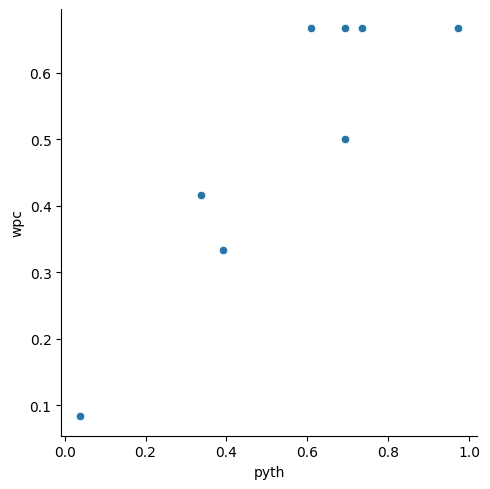

In [15]:
sns.relplot(x="pyth", y="wpc", data = Ivy_F23_conference_Merged)

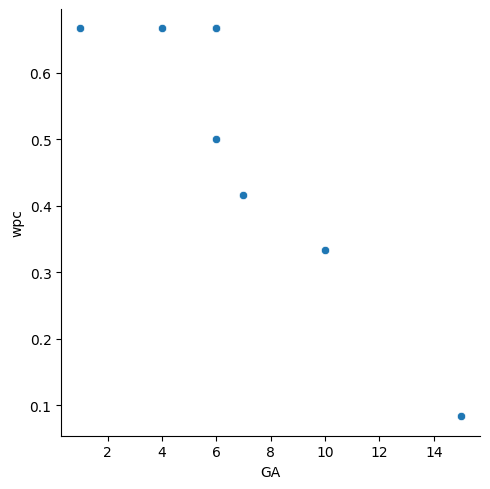

In [16]:
sns.relplot(x="GA", y="wpc", data = Ivy_F23_conference_Merged)

In [ ]:
pyth_lm = smf.ols(formula = 'GA ~ wpc', data=Ivy_F23_conference_Merged).fit()
print(pyth_lm.summary())

                            OLS Regression Results                            
Dep. Variable:                     GA   R-squared:                       0.691
Model:                            OLS   Adj. R-squared:                  0.647
Method:                 Least Squares   F-statistic:                     15.65
Date:                Fri, 09 Aug 2024   Prob (F-statistic):            0.00549
Time:                        05:25:51   Log-Likelihood:                -20.657
No. Observations:                   9   AIC:                             45.31
Df Residuals:                       7   BIC:                             45.71
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     20.0426      1.999     10.028      0.0

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  res = hypotest_fun_out(*samples, **kwds)


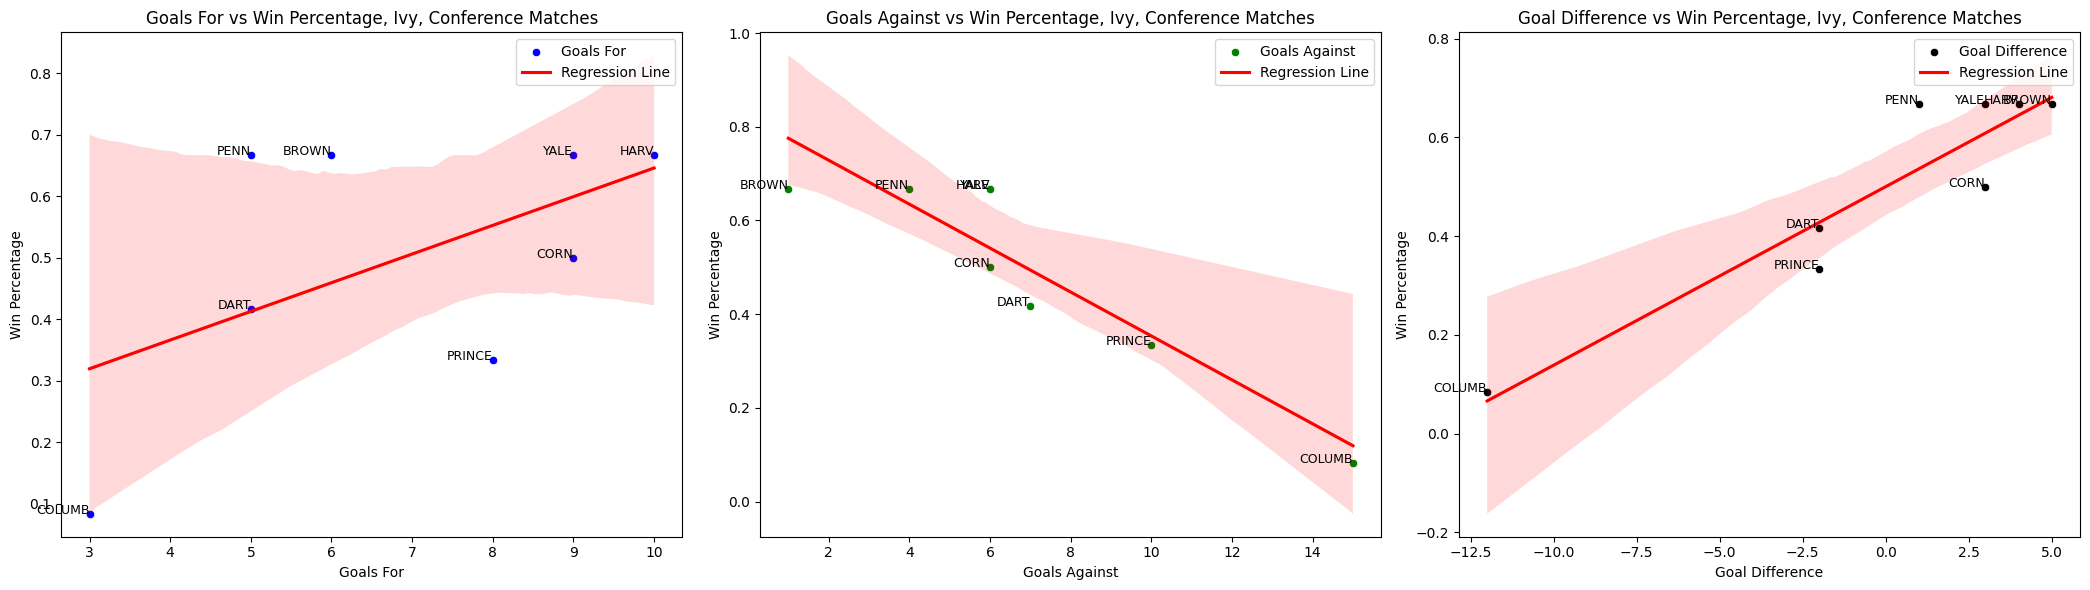

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

# Fit the linear models
gf_lm = smf.ols(formula='GF ~ wpc', data=Ivy_F23_conference_Merged).fit()
ga_lm = smf.ols(formula='GA ~ wpc', data=Ivy_F23_conference_Merged).fit()
gdf_lm = smf.ols(formula='GD ~ wpc', data=Ivy_F23_conference_Merged).fit()

# Create a figure with three subplots
fig, axes = plt.subplots(1, 3, figsize=(21, 6))  # Adjusted figsize to accommodate three plots

# Scatter plot and regression line for GF ~ wpc
sns.scatterplot(x='GF', y='wpc', data=Ivy_F23_conference_Merged, ax=axes[0], color='blue', label='Goals For')
sns.regplot(x='GF', y='wpc', data=Ivy_F23_conference_Merged, ax=axes[0], scatter=False, color='red', label='Regression Line')
axes[0].set_title('Goals For vs Win Percentage, Ivy, Conference Matches')
axes[0].set_xlabel('Goals For')
axes[0].set_ylabel('Win Percentage')

# Add team labels to the GF plot
for i in range(Ivy_F23_conference_Merged.shape[0]):
    axes[0].text(Ivy_F23_conference_Merged['GF'][i],
                 Ivy_F23_conference_Merged['wpc'][i],
                 Ivy_F23_conference_Merged['Teams'][i],
                 fontsize=9, ha='right')

axes[0].legend()

# Scatter plot and regression line for GA ~ wpc
sns.scatterplot(x='GA', y='wpc', data=Ivy_F23_conference_Merged, ax=axes[1], color='green', label='Goals Against')
sns.regplot(x='GA', y='wpc', data=Ivy_F23_conference_Merged, ax=axes[1], scatter=False, color='red', label='Regression Line')
axes[1].set_title('Goals Against vs Win Percentage, Ivy, Conference Matches')
axes[1].set_xlabel('Goals Against')
axes[1].set_ylabel('Win Percentage')

# Add team labels to the GA plot
for i in range(Ivy_F23_conference_Merged.shape[0]):
    axes[1].text(Ivy_F23_conference_Merged['GA'][i],
                 Ivy_F23_conference_Merged['wpc'][i],
                 Ivy_F23_conference_Merged['Teams'][i],
                 fontsize=9, ha='right')

axes[1].legend()

# Scatter plot and regression line for GD ~ wpc
sns.scatterplot(x='GD', y='wpc', data=Ivy_F23_conference_Merged, ax=axes[2], color='black', label='Goal Difference')
sns.regplot(x='GD', y='wpc', data=Ivy_F23_conference_Merged, ax=axes[2], scatter=False, color='red', label='Regression Line')
axes[2].set_title('Goal Difference vs Win Percentage, Ivy, Conference Matches')
axes[2].set_xlabel('Goal Difference')
axes[2].set_ylabel('Win Percentage')

# Add team labels to the GD plot
for i in range(Ivy_F23_conference_Merged.shape[0]):
    axes[2].text(Ivy_F23_conference_Merged['GD'][i],
                 Ivy_F23_conference_Merged['wpc'][i],
                 Ivy_F23_conference_Merged['Teams'][i],
                 fontsize=9, ha='right')

axes[2].legend()

# Show the plots
plt.tight_layout()
plt.show()


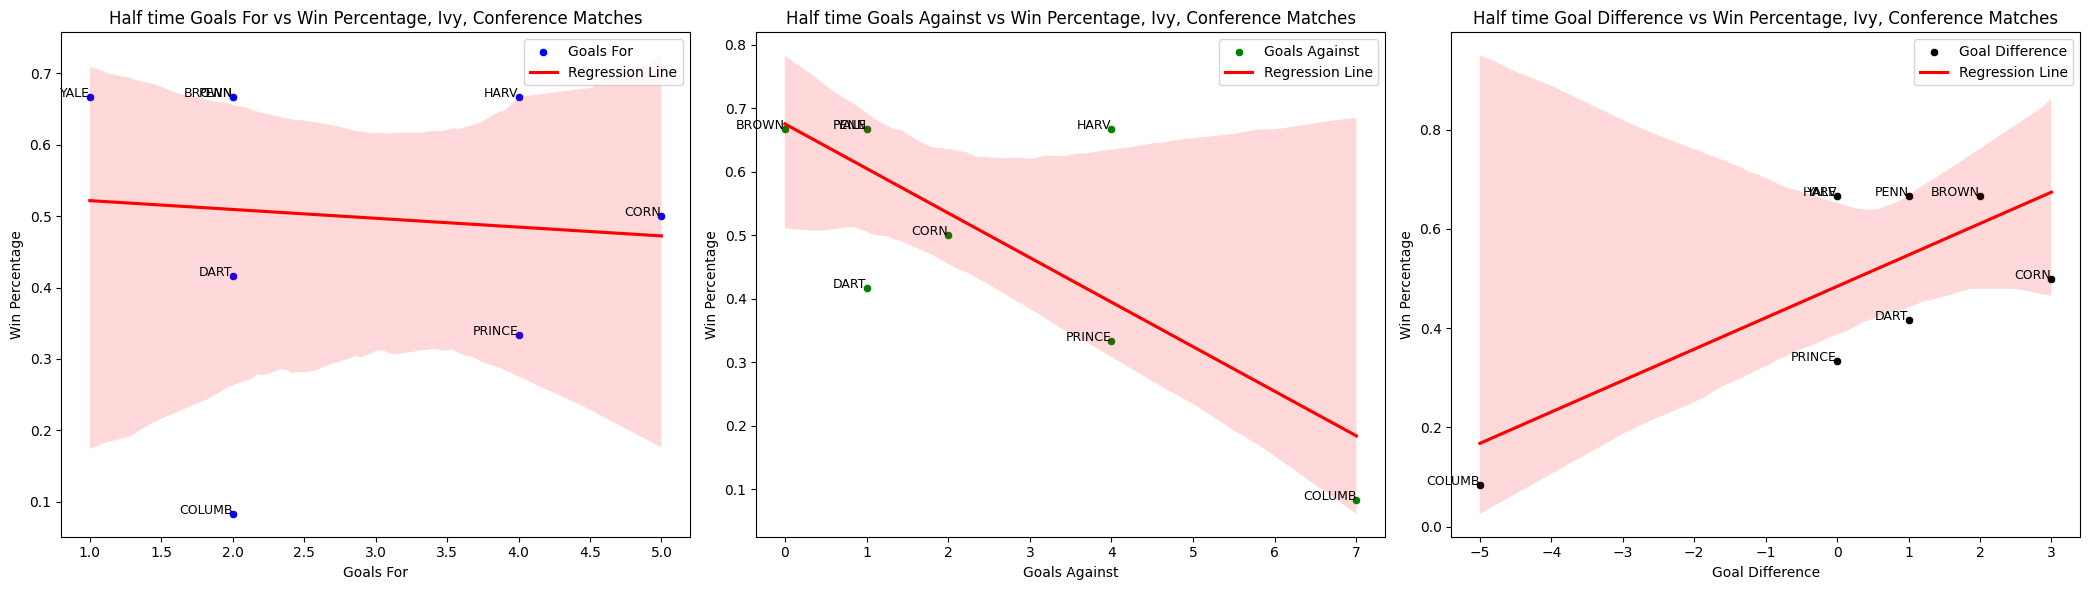

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

# Fit the linear models
gf_lm = smf.ols(formula='HTGF ~ wpc', data=Ivy_F23_conference_Merged).fit()
ga_lm = smf.ols(formula='HTGA ~ wpc', data=Ivy_F23_conference_Merged).fit()
gdf_lm = smf.ols(formula='HTGD ~ wpc', data=Ivy_F23_conference_Merged).fit()

# Create a figure with three subplots
fig, axes = plt.subplots(1, 3, figsize=(21, 6))  # Adjusted figsize to accommodate three plots

# Scatter plot and regression line for GF ~ wpc
sns.scatterplot(x='HTGF', y='wpc', data=Ivy_F23_conference_Merged, ax=axes[0], color='blue', label='Goals For')
sns.regplot(x='HTGF', y='wpc', data=Ivy_F23_conference_Merged, ax=axes[0], scatter=False, color='red', label='Regression Line')
axes[0].set_title('Half time Goals For vs Win Percentage, Ivy, Conference Matches')
axes[0].set_xlabel('Goals For')
axes[0].set_ylabel('Win Percentage')

# Add team labels to the GF plot
for i in range(Ivy_F23_conference_Merged.shape[0]):
    axes[0].text(Ivy_F23_conference_Merged['HTGF'][i],
                 Ivy_F23_conference_Merged['wpc'][i],
                 Ivy_F23_conference_Merged['Teams'][i],
                 fontsize=9, ha='right')

axes[0].legend()

# Scatter plot and regression line for GA ~ wpc
sns.scatterplot(x='HTGA', y='wpc', data=Ivy_F23_conference_Merged, ax=axes[1], color='green', label='Goals Against')
sns.regplot(x='HTGA', y='wpc', data=Ivy_F23_conference_Merged, ax=axes[1], scatter=False, color='red', label='Regression Line')
axes[1].set_title('Half time Goals Against vs Win Percentage, Ivy, Conference Matches')
axes[1].set_xlabel('Goals Against')
axes[1].set_ylabel('Win Percentage')

# Add team labels to the GA plot
for i in range(Ivy_F23_conference_Merged.shape[0]):
    axes[1].text(Ivy_F23_conference_Merged['HTGA'][i],
                 Ivy_F23_conference_Merged['wpc'][i],
                 Ivy_F23_conference_Merged['Teams'][i],
                 fontsize=9, ha='right')

axes[1].legend()

# Scatter plot and regression line for GD ~ wpc
sns.scatterplot(x='HTGD', y='wpc', data=Ivy_F23_conference_Merged, ax=axes[2], color='black', label='Goal Difference')
sns.regplot(x='HTGD', y='wpc', data=Ivy_F23_conference_Merged, ax=axes[2], scatter=False, color='red', label='Regression Line')
axes[2].set_title('Half time Goal Difference vs Win Percentage, Ivy, Conference Matches')
axes[2].set_xlabel('Goal Difference')
axes[2].set_ylabel('Win Percentage')

# Add team labels to the GD plot
for i in range(Ivy_F23_conference_Merged.shape[0]):
    axes[2].text(Ivy_F23_conference_Merged['HTGD'][i],
                 Ivy_F23_conference_Merged['wpc'][i],
                 Ivy_F23_conference_Merged['Teams'][i],
                 fontsize=9, ha='right')

axes[2].legend()

# Show the plots
plt.tight_layout()
plt.show()


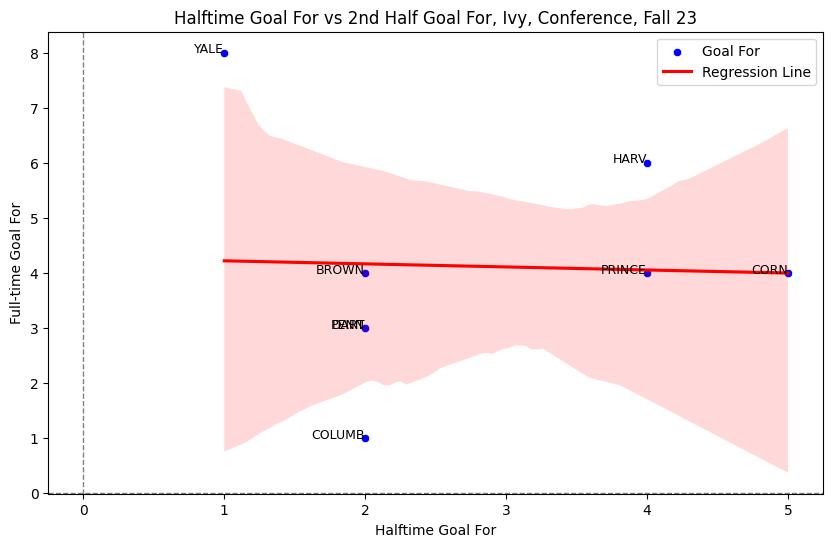

In [19]:
# Plot Halftime Goal Difference vs Full-time Goal Difference
plt.figure(figsize=(10, 6))
sns.scatterplot(x='HTGF', y='2GF', data=Ivy_F23_conference_Merged, color='blue', label='Goal For')
sns.regplot(x='HTGF', y='2GF', data=Ivy_F23_conference_Merged, scatter=False, color='red', label='Regression Line')
# Add team labels to the plot
for i in range(Ivy_F23_conference_Merged.shape[0]):
    plt.text(Ivy_F23_conference_Merged['HTGF'][i],
             Ivy_F23_conference_Merged['2GF'][i],
             Ivy_F23_conference_Merged['Teams'][i],
             fontsize=9, ha='right')
plt.title('Halftime Goal For vs 2nd Half Goal For, Ivy, Conference, Fall 23')
plt.xlabel('Halftime Goal For')
plt.ylabel('Full-time Goal For')
plt.axhline(0, color='gray', linestyle='--', linewidth=1)
plt.axvline(0, color='gray', linestyle='--', linewidth=1)
plt.legend()
plt.show()

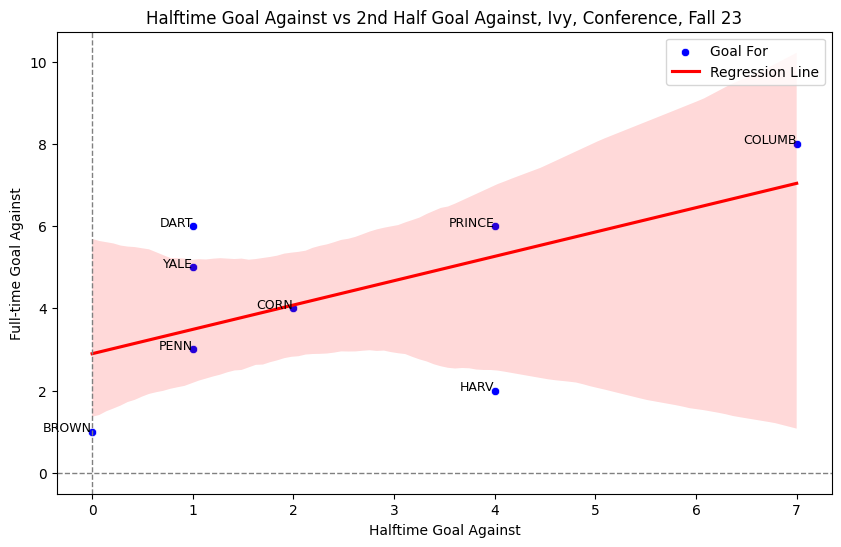

In [20]:
# Plot Halftime Goal Difference vs Full-time Goal Difference
plt.figure(figsize=(10, 6))
sns.scatterplot(x='HTGA', y='2GA', data=Ivy_F23_conference_Merged, color='blue', label='Goal For')
sns.regplot(x='HTGA', y='2GA', data=Ivy_F23_conference_Merged, scatter=False, color='red', label='Regression Line')
# Add team labels to the plot
for i in range(Ivy_F23_conference_Merged.shape[0]):
    plt.text(Ivy_F23_conference_Merged['HTGA'][i],
             Ivy_F23_conference_Merged['2GA'][i],
             Ivy_F23_conference_Merged['Teams'][i],
             fontsize=9, ha='right')
plt.title('Halftime Goal Against vs 2nd Half Goal Against, Ivy, Conference, Fall 23')
plt.xlabel('Halftime Goal Against')
plt.ylabel('Full-time Goal Against')
plt.axhline(0, color='gray', linestyle='--', linewidth=1)
plt.axvline(0, color='gray', linestyle='--', linewidth=1)
plt.legend()
plt.show()

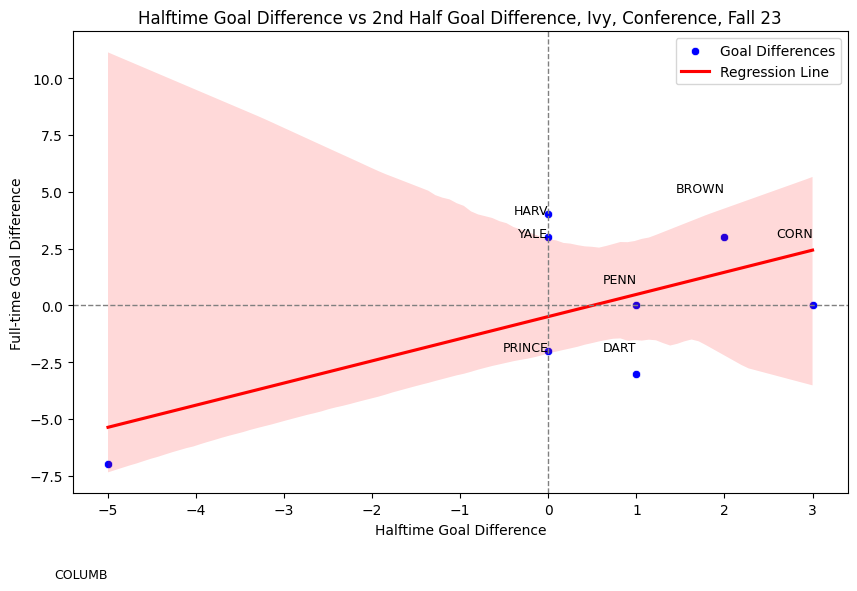

In [21]:
# Plot Halftime Goal Difference vs Full-time Goal Difference
plt.figure(figsize=(10, 6))
sns.scatterplot(x='HTGD', y='2GD', data=Ivy_F23_conference_Merged, color='blue', label='Goal Differences')
sns.regplot(x='HTGD', y='2GD', data=Ivy_F23_conference_Merged, scatter=False, color='red', label='Regression Line')
# Add team labels to the plot
for i in range(Ivy_F23_conference_Merged.shape[0]):
    plt.text(Ivy_F23_conference_Merged['HTGD'][i],
             Ivy_F23_conference_Merged['GD'][i],
             Ivy_F23_conference_Merged['Teams'][i],
             fontsize=9, ha='right')
plt.title('Halftime Goal Difference vs 2nd Half Goal Difference, Ivy, Conference, Fall 23')
plt.xlabel('Halftime Goal Difference')
plt.ylabel('Full-time Goal Difference')
plt.axhline(0, color='gray', linestyle='--', linewidth=1)
plt.axvline(0, color='gray', linestyle='--', linewidth=1)
plt.legend()
plt.show()

In [33]:
Ivy_F23_conference_Merged['2GFRatio'] = Ivy_F23_conference_Merged['2GF'] / Ivy_F23_conference_Merged['HTGF']
Ivy_F23_conference_Merged['2GARatio'] = Ivy_F23_conference_Merged['2GA'] / Ivy_F23_conference_Merged['HTGA']
Ivy_F23_conference_Merged['1GFRatio'] = Ivy_F23_conference_Merged['HTGF'] / Ivy_F23_conference_Merged['2GF']
Ivy_F23_conference_Merged['1GARatio'] = Ivy_F23_conference_Merged['HTGA'] / Ivy_F23_conference_Merged['2GA']
Ivy_F23_conference_Merged['GF/GARatio'] = Ivy_F23_conference_Merged['GF'] / Ivy_F23_conference_Merged['GA']
Ivy_F23_conference_Merged

,Teams,Pa,awinvalue,HTAG_x,HTHG_x,Scored_x,Conceded_x,Ph,hwinvalue,HTHG_y,HTAG_y,Scored_y,Conceded_y,W,G,GF,GA,HTGA,HTGF,HTGD,GD,2GF,2GA,2GD,Change_GD,awpc,hwpc,awpc:hwpc,wpc,pyth,pyth_ht,pyth_h2,pyth_diff,2GFRatio,2GARatio,1GFRatio,1GARatio,GF/GARatio
0,BROWN,3,1.5,0,1,1,1,3,2.5,1,0,5,0,4.0,6,6,1,0,2,2,5,4,1,3,1,50.000000,83.333333,0.600000,0.666667,0.972973,1.000000,0.941176,-0.058824,2.0,inf,0.500000,0.000000,6.000000
1,COLUMB,3,0.0,3,1,1,10,3,0.5,1,4,2,5,0.5,6,3,15,7,2,-5,-12,1,8,-7,-2,0.000000,16.666667,0.000000,0.083333,0.038462,0.075472,0.015385,-0.060087,0.5,1.142857,2.000000,0.875000,0.200000
2,CORN,3,1.5,1,1,3,2,3,1.5,4,1,6,4,3.0,6,9,6,2,5,3,3,4,4,0,-3,50.000000,50.000000,1.000000,0.500000,0.692308,0.862069,0.500000,-0.362069,0.8,2.000000,1.250000,0.500000,1.500000
3,DART,4,1.5,1,2,3,5,2,1.0,0,0,2,2,2.5,6,5,7,1,2,1,-2,3,6,-3,-4,37.500000,50.000000,0.750000,0.416667,0.337838,0.800000,0.200000,-0.600000,1.5,6.000000,0.666667,0.166667,0.714286
4,HARV,2,1.0,3,3,4,3,4,3.0,1,1,6,3,4.0,6,10,6,4,4,0,4,6,2,4,4,50.000000,75.000000,0.666667,0.666667,0.735294,0.500000,0.900000,0.400000,1.5,0.500000,0.666667,2.000000,1.666667
5,PENN,3,1.5,1,0,1,2,3,2.5,2,0,4,2,4.0,6,5,4,1,2,1,1,3,3,0,-1,50.000000,83.333333,0.600000,0.666667,0.609756,0.800000,0.500000,-0.300000,1.5,3.000000,0.666667,0.333333,1.250000
6,PRINCE,3,0.5,0,3,3,8,3,1.5,1,4,5,2,2.0,6,8,10,4,4,0,-2,4,6,-2,-2,16.666667,50.000000,0.333333,0.333333,0.390244,0.500000,0.307692,-0.192308,1.0,1.500000,1.000000,0.666667,0.800000
7,YALE,3,1.5,1,0,4,4,3,2.5,1,0,5,2,4.0,6,9,6,1,1,0,3,8,5,3,3,50.000000,83.333333,0.600000,0.666667,0.692308,0.500000,0.719101,0.219101,8.0,5.000000,0.125000,0.200000,1.500000


<ipython-input-27-cc9fb16fa12f>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='2GFRatio', y='Teams', data=Ivy_F23_conference_Merged_sorted, palette='Blues_d')


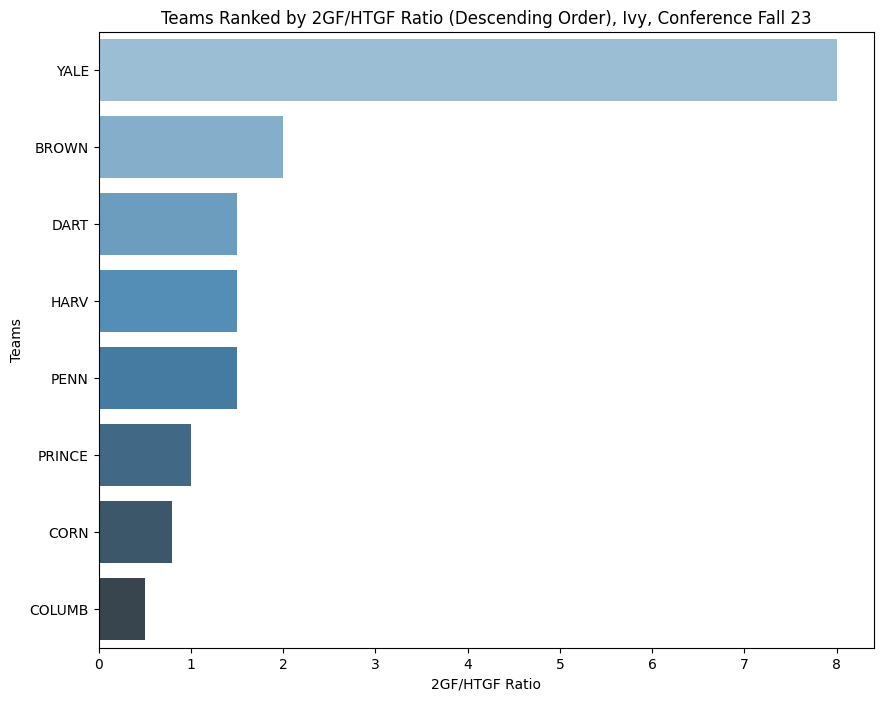

In [27]:
# Handle any potential infinite or NaN values (e.g., when HTGF is 0)
Ivy_F23_conference_Merged.replace([float('inf'), -float('inf')], pd.NA, inplace=True)
Ivy_F23_conference_Merged.dropna(subset=['2GFRatio'], inplace=True)

# Sort the DataFrame by the ratio in ascending order
Ivy_F23_conference_Merged_sorted = Ivy_F23_conference_Merged.sort_values('2GFRatio', ascending = False)

# Plot the data
plt.figure(figsize=(10, 8))
sns.barplot(x='2GFRatio', y='Teams', data=Ivy_F23_conference_Merged_sorted, palette='Blues_d')

plt.title('Teams Ranked by 2GF/HTGF Ratio (Descending Order), Ivy, Conference Fall 23')
plt.xlabel('2GF/HTGF Ratio')
plt.ylabel('Teams')
plt.show()

<ipython-input-24-c9f4028d6ee7>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='2GARatio', y='Teams', data=Ivy_F23_conference_Merged_sorted, palette='Reds_d')


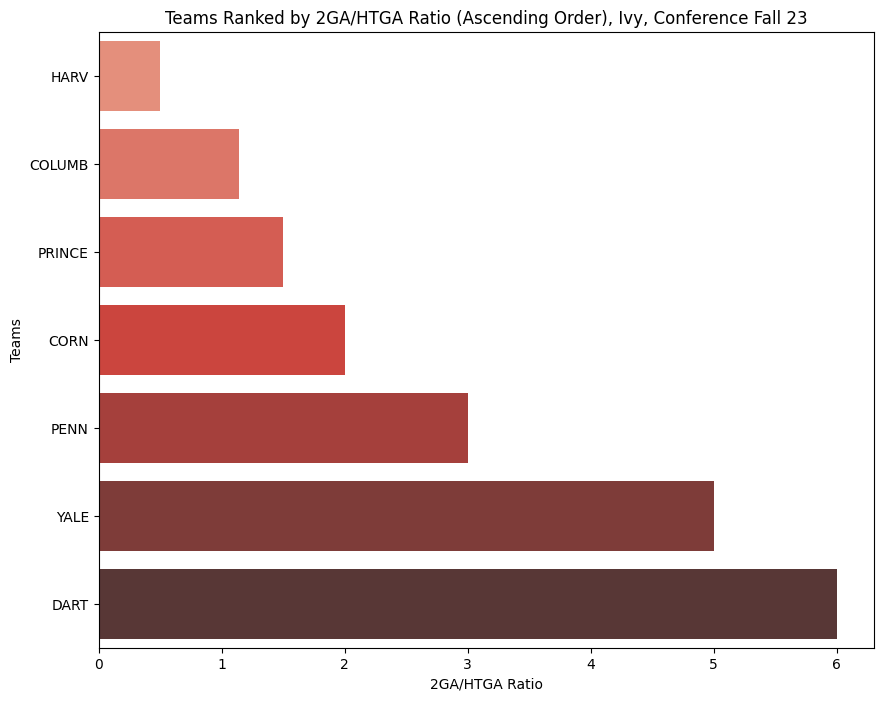

In [24]:
# Handle any potential infinite or NaN values (e.g., when HTGF is 0)
Ivy_F23_conference_Merged.replace([float('inf'), -float('inf')], pd.NA, inplace=True)
Ivy_F23_conference_Merged.dropna(subset=['2GARatio'], inplace=True)

# Sort the DataFrame by the ratio in ascending order
Ivy_F23_conference_Merged_sorted = Ivy_F23_conference_Merged.sort_values('2GARatio', ascending = True)

# Plot the data
plt.figure(figsize=(10, 8))
sns.barplot(x='2GARatio', y='Teams', data=Ivy_F23_conference_Merged_sorted, palette='Reds_d')

plt.title('Teams Ranked by 2GA/HTGA Ratio (Ascending Order), Ivy, Conference Fall 23')
plt.xlabel('2GA/HTGA Ratio')
plt.ylabel('Teams')
plt.show()

<ipython-input-28-a74ece044234>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='GF/GARatio', y='Teams', data=Ivy_F23_conference_Merged_sorted, palette='Blues_d')


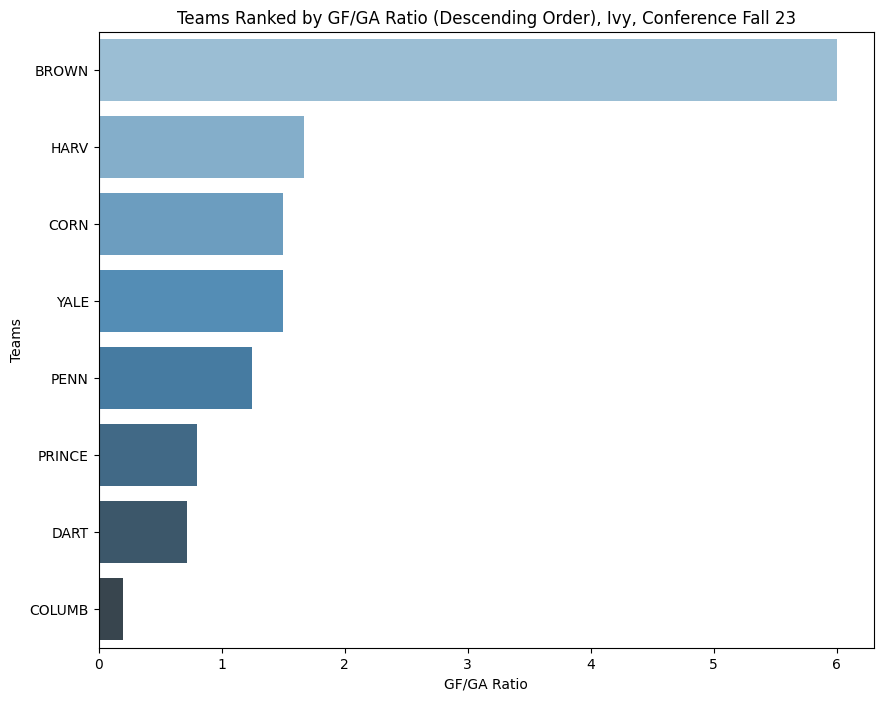

,Teams,Pa,awinvalue,HTAG_x,HTHG_x,Scored_x,Conceded_x,Ph,hwinvalue,HTHG_y,HTAG_y,Scored_y,Conceded_y,W,G,GF,GA,HTGA,HTGF,HTGD,GD,2GF,2GA,2GD,Change_GD,awpc,hwpc,awpc:hwpc,wpc,pyth,pyth_ht,pyth_h2,pyth_diff,2GFRatio,2GARatio,1GFRatio,1GARatio,GF/GARatio
0,BROWN,3,1.5,0,1,1,1,3,2.5,1,0,5,0,4.0,6,6,1,0,2,2,5,4,1,3,1,50.000000,83.333333,1.666667,0.666667,0.972973,1.000000,0.941176,-0.058824,2.0,<NA>,0.500000,0.000000,6.000000
1,COLUMB,3,0.0,3,1,1,10,3,0.5,1,4,2,5,0.5,6,3,15,7,2,-5,-12,1,8,-7,-2,0.000000,16.666667,<NA>,0.083333,0.038462,0.075472,0.015385,-0.060087,0.5,1.142857,2.000000,0.875000,0.200000
2,CORN,3,1.5,1,1,3,2,3,1.5,4,1,6,4,3.0,6,9,6,2,5,3,3,4,4,0,-3,50.000000,50.000000,1.0,0.500000,0.692308,0.862069,0.500000,-0.362069,0.8,2.0,1.250000,0.500000,1.500000
3,DART,4,1.5,1,2,3,5,2,1.0,0,0,2,2,2.5,6,5,7,1,2,1,-2,3,6,-3,-4,37.500000,50.000000,1.333333,0.416667,0.337838,0.800000,0.200000,-0.600000,1.5,6.0,0.666667,0.166667,0.714286
4,HARV,2,1.0,3,3,4,3,4,3.0,1,1,6,3,4.0,6,10,6,4,4,0,4,6,2,4,4,50.000000,75.000000,1.5,0.666667,0.735294,0.500000,0.900000,0.400000,1.5,0.5,0.666667,2.000000,1.666667
5,PENN,3,1.5,1,0,1,2,3,2.5,2,0,4,2,4.0,6,5,4,1,2,1,1,3,3,0,-1,50.000000,83.333333,1.666667,0.666667,0.609756,0.800000,0.500000,-0.300000,1.5,3.0,0.666667,0.333333,1.250000
6,PRINCE,3,0.5,0,3,3,8,3,1.5,1,4,5,2,2.0,6,8,10,4,4,0,-2,4,6,-2,-2,16.666667,50.000000,3.0,0.333333,0.390244,0.500000,0.307692,-0.192308,1.0,1.5,1.000000,0.666667,0.800000
7,YALE,3,1.5,1,0,4,4,3,2.5,1,0,5,2,4.0,6,9,6,1,1,0,3,8,5,3,3,50.000000,83.333333,1.666667,0.666667,0.692308,0.500000,0.719101,0.219101,8.0,5.0,0.125000,0.200000,1.500000


In [28]:
# Handle any potential infinite or NaN values (e.g., when HTGF is 0)
Ivy_F23_conference_Merged.replace([float('inf'), -float('inf')], pd.NA, inplace=True)
Ivy_F23_conference_Merged.dropna(subset=['GF/GARatio'], inplace=True)

# Sort the DataFrame by the ratio in ascending order
Ivy_F23_conference_Merged_sorted = Ivy_F23_conference_Merged.sort_values('GF/GARatio', ascending = False)

# Plot the data
plt.figure(figsize=(10, 8))
sns.barplot(x='GF/GARatio', y='Teams', data=Ivy_F23_conference_Merged_sorted, palette='Blues_d')

plt.title('Teams Ranked by GF/GA Ratio (Descending Order), Ivy, Conference Fall 23')
plt.xlabel('GF/GA Ratio')
plt.ylabel('Teams')
plt.show()

Ivy_F23_conference_Merged

<ipython-input-30-9a50a20cfb13>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='awpc', y='Teams', data=Ivy_F23_conference_Merged_sorted, palette='Blues_d')


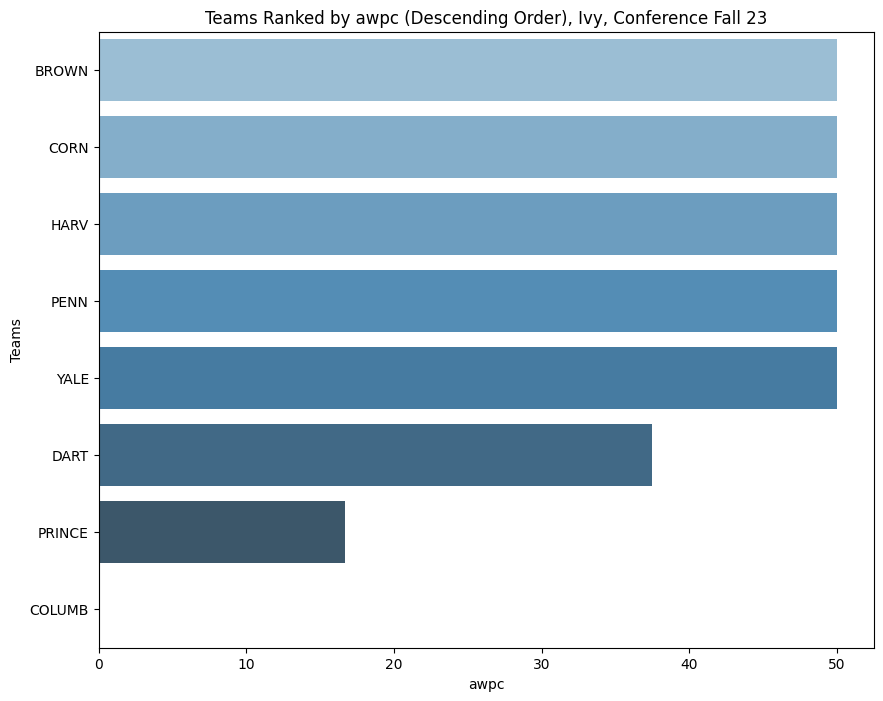

,Teams,Pa,awinvalue,HTAG_x,HTHG_x,Scored_x,Conceded_x,Ph,hwinvalue,HTHG_y,HTAG_y,Scored_y,Conceded_y,W,G,GF,GA,HTGA,HTGF,HTGD,GD,2GF,2GA,2GD,Change_GD,awpc,hwpc,awpc:hwpc,wpc,pyth,pyth_ht,pyth_h2,pyth_diff,2GFRatio,2GARatio,1GFRatio,1GARatio,GF/GARatio
0,BROWN,3,1.5,0,1,1,1,3,2.5,1,0,5,0,4.0,6,6,1,0,2,2,5,4,1,3,1,50.000000,83.333333,1.666667,0.666667,0.972973,1.000000,0.941176,-0.058824,2.0,<NA>,0.500000,0.000000,6.000000
1,COLUMB,3,0.0,3,1,1,10,3,0.5,1,4,2,5,0.5,6,3,15,7,2,-5,-12,1,8,-7,-2,0.000000,16.666667,<NA>,0.083333,0.038462,0.075472,0.015385,-0.060087,0.5,1.142857,2.000000,0.875000,0.200000
2,CORN,3,1.5,1,1,3,2,3,1.5,4,1,6,4,3.0,6,9,6,2,5,3,3,4,4,0,-3,50.000000,50.000000,1.0,0.500000,0.692308,0.862069,0.500000,-0.362069,0.8,2.0,1.250000,0.500000,1.500000
3,DART,4,1.5,1,2,3,5,2,1.0,0,0,2,2,2.5,6,5,7,1,2,1,-2,3,6,-3,-4,37.500000,50.000000,1.333333,0.416667,0.337838,0.800000,0.200000,-0.600000,1.5,6.0,0.666667,0.166667,0.714286
4,HARV,2,1.0,3,3,4,3,4,3.0,1,1,6,3,4.0,6,10,6,4,4,0,4,6,2,4,4,50.000000,75.000000,1.5,0.666667,0.735294,0.500000,0.900000,0.400000,1.5,0.5,0.666667,2.000000,1.666667
5,PENN,3,1.5,1,0,1,2,3,2.5,2,0,4,2,4.0,6,5,4,1,2,1,1,3,3,0,-1,50.000000,83.333333,1.666667,0.666667,0.609756,0.800000,0.500000,-0.300000,1.5,3.0,0.666667,0.333333,1.250000
6,PRINCE,3,0.5,0,3,3,8,3,1.5,1,4,5,2,2.0,6,8,10,4,4,0,-2,4,6,-2,-2,16.666667,50.000000,3.0,0.333333,0.390244,0.500000,0.307692,-0.192308,1.0,1.5,1.000000,0.666667,0.800000
7,YALE,3,1.5,1,0,4,4,3,2.5,1,0,5,2,4.0,6,9,6,1,1,0,3,8,5,3,3,50.000000,83.333333,1.666667,0.666667,0.692308,0.500000,0.719101,0.219101,8.0,5.0,0.125000,0.200000,1.500000


In [30]:
# Handle any potential infinite or NaN values (e.g., when HTGF is 0)
Ivy_F23_conference_Merged.replace([float('inf'), -float('inf')], pd.NA, inplace=True)
Ivy_F23_conference_Merged.dropna(subset=['awpc'], inplace=True)

# Sort the DataFrame by the ratio in ascending order
Ivy_F23_conference_Merged_sorted = Ivy_F23_conference_Merged.sort_values('awpc', ascending = False)

# Plot the data
plt.figure(figsize=(10, 8))
sns.barplot(x='awpc', y='Teams', data=Ivy_F23_conference_Merged_sorted, palette='Blues_d')

plt.title('Teams Ranked by awpc (Descending Order), Ivy, Conference Fall 23')
plt.xlabel('awpc')
plt.ylabel('Teams')
plt.show()

Ivy_F23_conference_Merged

<ipython-input-35-f6d6d6ae7f42>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='hwpc', y='Teams', data=Ivy_F23_conference_Merged_sorted, palette='Blues_d')


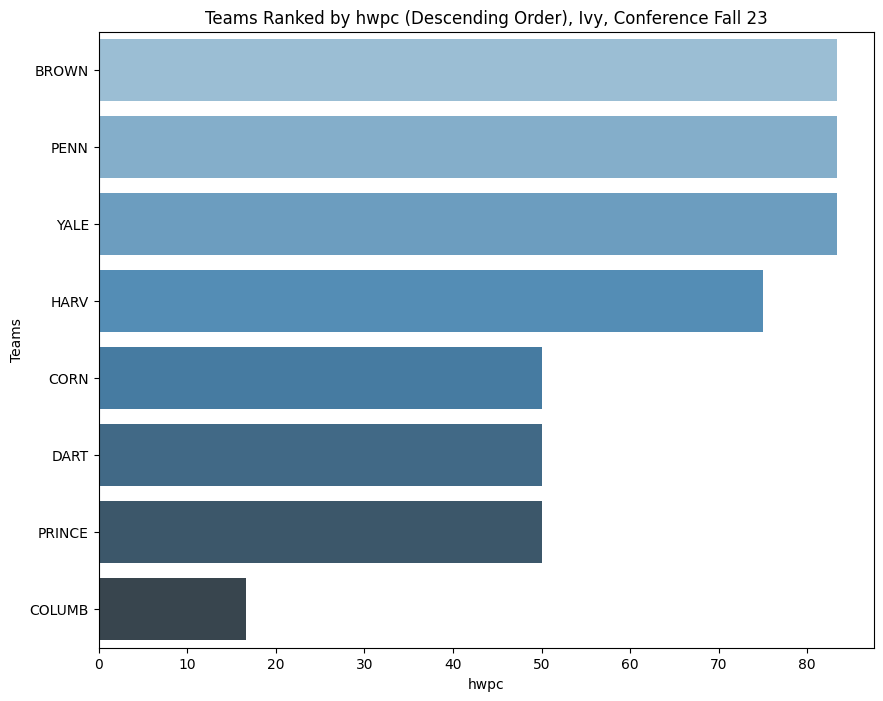

,Teams,Pa,awinvalue,HTAG_x,HTHG_x,Scored_x,Conceded_x,Ph,hwinvalue,HTHG_y,HTAG_y,Scored_y,Conceded_y,W,G,GF,GA,HTGA,HTGF,HTGD,GD,2GF,2GA,2GD,Change_GD,awpc,hwpc,awpc:hwpc,wpc,pyth,pyth_ht,pyth_h2,pyth_diff,2GFRatio,2GARatio,1GFRatio,1GARatio,GF/GARatio
0,BROWN,3,1.5,0,1,1,1,3,2.5,1,0,5,0,4.0,6,6,1,0,2,2,5,4,1,3,1,50.000000,83.333333,0.600000,0.666667,0.972973,1.000000,0.941176,-0.058824,2.0,<NA>,0.500000,0.000000,6.000000
1,COLUMB,3,0.0,3,1,1,10,3,0.5,1,4,2,5,0.5,6,3,15,7,2,-5,-12,1,8,-7,-2,0.000000,16.666667,0.000000,0.083333,0.038462,0.075472,0.015385,-0.060087,0.5,1.142857,2.000000,0.875000,0.200000
2,CORN,3,1.5,1,1,3,2,3,1.5,4,1,6,4,3.0,6,9,6,2,5,3,3,4,4,0,-3,50.000000,50.000000,1.000000,0.500000,0.692308,0.862069,0.500000,-0.362069,0.8,2.0,1.250000,0.500000,1.500000
3,DART,4,1.5,1,2,3,5,2,1.0,0,0,2,2,2.5,6,5,7,1,2,1,-2,3,6,-3,-4,37.500000,50.000000,0.750000,0.416667,0.337838,0.800000,0.200000,-0.600000,1.5,6.0,0.666667,0.166667,0.714286
4,HARV,2,1.0,3,3,4,3,4,3.0,1,1,6,3,4.0,6,10,6,4,4,0,4,6,2,4,4,50.000000,75.000000,0.666667,0.666667,0.735294,0.500000,0.900000,0.400000,1.5,0.5,0.666667,2.000000,1.666667
5,PENN,3,1.5,1,0,1,2,3,2.5,2,0,4,2,4.0,6,5,4,1,2,1,1,3,3,0,-1,50.000000,83.333333,0.600000,0.666667,0.609756,0.800000,0.500000,-0.300000,1.5,3.0,0.666667,0.333333,1.250000
6,PRINCE,3,0.5,0,3,3,8,3,1.5,1,4,5,2,2.0,6,8,10,4,4,0,-2,4,6,-2,-2,16.666667,50.000000,0.333333,0.333333,0.390244,0.500000,0.307692,-0.192308,1.0,1.5,1.000000,0.666667,0.800000
7,YALE,3,1.5,1,0,4,4,3,2.5,1,0,5,2,4.0,6,9,6,1,1,0,3,8,5,3,3,50.000000,83.333333,0.600000,0.666667,0.692308,0.500000,0.719101,0.219101,8.0,5.0,0.125000,0.200000,1.500000


In [35]:
# Handle any potential infinite or NaN values (e.g., when HTGF is 0)
Ivy_F23_conference_Merged.replace([float('inf'), -float('inf')], pd.NA, inplace=True)
Ivy_F23_conference_Merged.dropna(subset=['hwpc'], inplace=True)

# Sort the DataFrame by the ratio in ascending order
Ivy_F23_conference_Merged_sorted = Ivy_F23_conference_Merged.sort_values('hwpc', ascending = False)

# Plot the data
plt.figure(figsize=(10, 8))
sns.barplot(x='hwpc', y='Teams', data=Ivy_F23_conference_Merged_sorted, palette='Blues_d')

plt.title('Teams Ranked by hwpc (Descending Order), Ivy, Conference Fall 23')
plt.xlabel('hwpc')
plt.ylabel('Teams')
plt.show()

Ivy_F23_conference_Merged

<ipython-input-34-3001c148c663>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='awpc:hwpc', y='Teams', data=Ivy_F23_conference_Merged_sorted, palette='Blues_d')


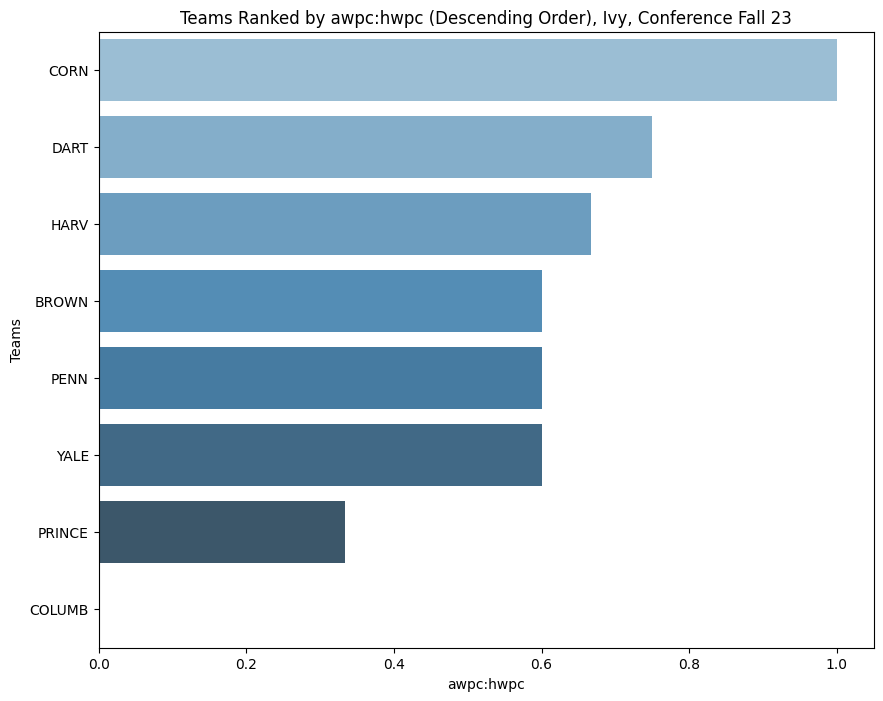

,Teams,Pa,awinvalue,HTAG_x,HTHG_x,Scored_x,Conceded_x,Ph,hwinvalue,HTHG_y,HTAG_y,Scored_y,Conceded_y,W,G,GF,GA,HTGA,HTGF,HTGD,GD,2GF,2GA,2GD,Change_GD,awpc,hwpc,awpc:hwpc,wpc,pyth,pyth_ht,pyth_h2,pyth_diff,2GFRatio,2GARatio,1GFRatio,1GARatio,GF/GARatio
0,BROWN,3,1.5,0,1,1,1,3,2.5,1,0,5,0,4.0,6,6,1,0,2,2,5,4,1,3,1,50.000000,83.333333,0.600000,0.666667,0.972973,1.000000,0.941176,-0.058824,2.0,<NA>,0.500000,0.000000,6.000000
1,COLUMB,3,0.0,3,1,1,10,3,0.5,1,4,2,5,0.5,6,3,15,7,2,-5,-12,1,8,-7,-2,0.000000,16.666667,0.000000,0.083333,0.038462,0.075472,0.015385,-0.060087,0.5,1.142857,2.000000,0.875000,0.200000
2,CORN,3,1.5,1,1,3,2,3,1.5,4,1,6,4,3.0,6,9,6,2,5,3,3,4,4,0,-3,50.000000,50.000000,1.000000,0.500000,0.692308,0.862069,0.500000,-0.362069,0.8,2.0,1.250000,0.500000,1.500000
3,DART,4,1.5,1,2,3,5,2,1.0,0,0,2,2,2.5,6,5,7,1,2,1,-2,3,6,-3,-4,37.500000,50.000000,0.750000,0.416667,0.337838,0.800000,0.200000,-0.600000,1.5,6.0,0.666667,0.166667,0.714286
4,HARV,2,1.0,3,3,4,3,4,3.0,1,1,6,3,4.0,6,10,6,4,4,0,4,6,2,4,4,50.000000,75.000000,0.666667,0.666667,0.735294,0.500000,0.900000,0.400000,1.5,0.5,0.666667,2.000000,1.666667
5,PENN,3,1.5,1,0,1,2,3,2.5,2,0,4,2,4.0,6,5,4,1,2,1,1,3,3,0,-1,50.000000,83.333333,0.600000,0.666667,0.609756,0.800000,0.500000,-0.300000,1.5,3.0,0.666667,0.333333,1.250000
6,PRINCE,3,0.5,0,3,3,8,3,1.5,1,4,5,2,2.0,6,8,10,4,4,0,-2,4,6,-2,-2,16.666667,50.000000,0.333333,0.333333,0.390244,0.500000,0.307692,-0.192308,1.0,1.5,1.000000,0.666667,0.800000
7,YALE,3,1.5,1,0,4,4,3,2.5,1,0,5,2,4.0,6,9,6,1,1,0,3,8,5,3,3,50.000000,83.333333,0.600000,0.666667,0.692308,0.500000,0.719101,0.219101,8.0,5.0,0.125000,0.200000,1.500000


In [34]:
# Handle any potential infinite or NaN values (e.g., when HTGF is 0)
Ivy_F23_conference_Merged.replace([float('inf'), -float('inf')], pd.NA, inplace=True)
Ivy_F23_conference_Merged.dropna(subset=['awpc:hwpc'], inplace=True)

# Sort the DataFrame by the ratio in ascending order
Ivy_F23_conference_Merged_sorted = Ivy_F23_conference_Merged.sort_values('awpc:hwpc', ascending = False)

# Plot the data
plt.figure(figsize=(10, 8))
sns.barplot(x='awpc:hwpc', y='Teams', data=Ivy_F23_conference_Merged_sorted, palette='Blues_d')

plt.title('Teams Ranked by awpc:hwpc (Descending Order), Ivy, Conference Fall 23')
plt.xlabel('awpc:hwpc')
plt.ylabel('Teams')
plt.show()

Ivy_F23_conference_Merged

In [37]:
# For ALL matches (conference + non-conference)

Ivy_F23_Merged = pd.merge(Ivy_F23_Away,Ivy_F23_Home, on = ['Teams'])
Ivy_F23_Merged['W'] = Ivy_F23_Merged['awinvalue'] + Ivy_F23_Merged['hwinvalue']
Ivy_F23_Merged['G'] = Ivy_F23_Merged['Played Home_x'] + Ivy_F23_Merged['Played Home_y']
Ivy_F23_Merged['GF'] = Ivy_F23_Merged['Scored_x'] + Ivy_F23_Merged['Scored_y']
Ivy_F23_Merged['GA'] = Ivy_F23_Merged['Conceded_x'] + Ivy_F23_Merged['Conceded_y']
Ivy_F23_Merged['GD'] = Ivy_F23_Merged['GF'] - Ivy_F23_Merged['GA']
Ivy_F23_Merged['HTGA'] = Ivy_F23_Merged['HTAG_x'] + Ivy_F23_Merged['HTAG_y']
Ivy_F23_Merged['HTGF'] = Ivy_F23_Merged['HTHG_x'] + Ivy_F23_Merged['HTHG_y']
Ivy_F23_Merged['HTGD'] = Ivy_F23_Merged['HTGF'] - Ivy_F23_Merged['HTGA']
Ivy_F23_Merged['2GF'] = Ivy_F23_Merged['GF'] - Ivy_F23_Merged['HTGF']
Ivy_F23_Merged['2GA'] = Ivy_F23_Merged['GA'] - Ivy_F23_Merged['HTGA']
Ivy_F23_Merged['2GD'] = Ivy_F23_Merged['2GF'] - Ivy_F23_Merged['2GA']
Ivy_F23_Merged['Change_GD'] = Ivy_F23_Merged['2GD'] - Ivy_F23_Merged['HTGD']
Ivy_F23_Merged['awpc'] = Ivy_F23_Merged['awinvalue'] / Ivy_F23_Merged['Played Home_x']
Ivy_F23_Merged['hwpc'] = Ivy_F23_Merged['hwinvalue'] / Ivy_F23_Merged['Played Home_y']
Ivy_F23_Merged['awpc:hwpc'] = Ivy_F23_Merged['awpc'] / Ivy_F23_Merged['hwpc']
Ivy_F23_Merged['wpc'] = Ivy_F23_Merged['W']/Ivy_F23_Merged['G']
Ivy_F23_Merged['pyth'] = Ivy_F23_Merged['GF']**2/(Ivy_F23_Merged['GF']**2 + Ivy_F23_Merged['GA']**2)
Ivy_F23_Merged['pyth_ht'] = Ivy_F23_Merged['HTGF']**2/(Ivy_F23_Merged['HTGF']**2 + Ivy_F23_Merged['HTGA']**2)
Ivy_F23_Merged['pyth_h2'] = Ivy_F23_Merged['2GF']**2/(Ivy_F23_Merged['2GF']**2 + Ivy_F23_Merged['2GA']**2)
Ivy_F23_Merged['pyth_diff'] = Ivy_F23_Merged['pyth_h2'] - Ivy_F23_Merged['pyth_ht']
Ivy_F23_Merged

,Teams,Played Home_x,awinvalue,HTAG_x,HTHG_x,Scored_x,Conceded_x,Played Home_y,hwinvalue,HTHG_y,HTAG_y,Scored_y,Conceded_y,W,G,GF,GA,GD,HTGA,HTGF,HTGD,2GF,2GA,2GD,Change_GD,awpc,hwpc,awpc:hwpc,wpc,pyth,pyth_ht,pyth_h2,pyth_diff
0,BROWN,6,3.0,1,2,3,4,9,5.0,4,4,13,12,8.0,15,16,16,0,5,6,1,10,11,-1,-2,0.500000,0.555556,0.900000,0.533333,0.500000,0.590164,0.452489,-0.137675
1,COLUMB,8,1.0,4,6,4,17,5,2.5,2,5,7,5,3.5,13,11,22,-11,9,8,-1,3,13,-10,-9,0.125000,0.500000,0.250000,0.269231,0.200000,0.441379,0.050562,-0.390818
2,CORN,8,4.5,5,3,11,8,6,4.5,7,3,14,8,9.0,14,25,16,9,8,10,2,15,8,7,5,0.562500,0.750000,0.750000,0.642857,0.709421,0.609756,0.778547,0.168791
3,DART,7,2.0,2,3,5,12,7,3.0,5,2,11,11,5.0,14,16,23,-7,4,8,4,8,19,-11,-15,0.285714,0.428571,0.666667,0.357143,0.326115,0.800000,0.150588,-0.649412
4,FAIR,1,1.0,2,0,6,0,1,0.0,0,3,2,4,1.0,2,8,4,4,5,0,-5,8,-1,9,14,1.000000,0.000000,inf,0.500000,0.800000,0.000000,0.984615,0.984615
5,FORDHM,1,0.5,1,1,2,2,1,1.0,1,0,2,1,1.5,2,4,3,1,1,2,1,2,2,0,-1,0.500000,1.000000,0.500000,0.750000,0.640000,0.800000,0.500000,-0.300000
6,HARV,6,3.0,6,5,10,8,9,5.0,2,5,9,10,8.0,15,19,18,1,11,7,-4,12,7,5,9,0.500000,0.555556,0.900000,0.533333,0.527007,0.288235,0.746114,0.457879
7,HOLYCR,1,0.0,0,2,1,3,1,0.0,0,0,1,2,0.0,2,2,5,-3,0,2,2,0,5,-5,-7,0.000000,0.000000,NaN,0.000000,0.137931,1.000000,0.000000,-1.000000
8,LEHIGH,1,0.0,0,1,0,5,1,0.5,2,1,1,1,0.5,2,1,6,-5,1,3,2,-2,5,-7,-9,0.000000,0.500000,0.000000,0.250000,0.027027,0.900000,0.137931,-0.762069
9,MONMTH,1,0.5,1,0,1,1,1,0.0,0,2,1,4,0.5,2,2,5,-3,3,0,-3,2,2,0,3,0.500000,0.000000,inf,0.250000,0.137931,0.000000,0.500000,0.500000


In [38]:
# List of teams to drop
teams_to_drop = ['BROWN','COLUMB','CORN','DART','HARV','PENN','PRINCE','YALE']  # Replace these with the actual team names you want to drop

# Drop the specified teams
Ivy_F23_Merged = Ivy_F23_Merged[Ivy_F23_Merged['Teams'].isin(teams_to_drop)]

# Display the updated DataFrame
Ivy_F23_Merged

,Teams,Played Home_x,awinvalue,HTAG_x,HTHG_x,Scored_x,Conceded_x,Played Home_y,hwinvalue,HTHG_y,HTAG_y,Scored_y,Conceded_y,W,G,GF,GA,GD,HTGA,HTGF,HTGD,2GF,2GA,2GD,Change_GD,awpc,hwpc,awpc:hwpc,wpc,pyth,pyth_ht,pyth_h2,pyth_diff
0,BROWN,6,3.0,1,2,3,4,9,5.0,4,4,13,12,8.0,15,16,16,0,5,6,1,10,11,-1,-2,0.500000,0.555556,0.900000,0.533333,0.500000,0.590164,0.452489,-0.137675
1,COLUMB,8,1.0,4,6,4,17,5,2.5,2,5,7,5,3.5,13,11,22,-11,9,8,-1,3,13,-10,-9,0.125000,0.500000,0.250000,0.269231,0.200000,0.441379,0.050562,-0.390818
2,CORN,8,4.5,5,3,11,8,6,4.5,7,3,14,8,9.0,14,25,16,9,8,10,2,15,8,7,5,0.562500,0.750000,0.750000,0.642857,0.709421,0.609756,0.778547,0.168791
3,DART,7,2.0,2,3,5,12,7,3.0,5,2,11,11,5.0,14,16,23,-7,4,8,4,8,19,-11,-15,0.285714,0.428571,0.666667,0.357143,0.326115,0.800000,0.150588,-0.649412
6,HARV,6,3.0,6,5,10,8,9,5.0,2,5,9,10,8.0,15,19,18,1,11,7,-4,12,7,5,9,0.500000,0.555556,0.900000,0.533333,0.527007,0.288235,0.746114,0.457879
10,PENN,8,3.5,1,2,5,5,6,5.0,5,2,13,4,8.5,14,18,9,9,3,7,4,11,6,5,1,0.437500,0.833333,0.525000,0.607143,0.800000,0.844828,0.770701,-0.074127
11,PRINCE,6,1.5,4,5,9,15,8,4.0,3,8,12,12,5.5,14,21,27,-6,12,8,-4,13,15,-2,2,0.250000,0.500000,0.500000,0.392857,0.376923,0.307692,0.428934,0.121242
20,YALE,8,3.5,3,4,8,12,7,5.5,4,1,11,5,9.0,15,19,17,2,4,8,4,11,13,-2,-6,0.437500,0.785714,0.556818,0.600000,0.555385,0.800000,0.417241,-0.382759


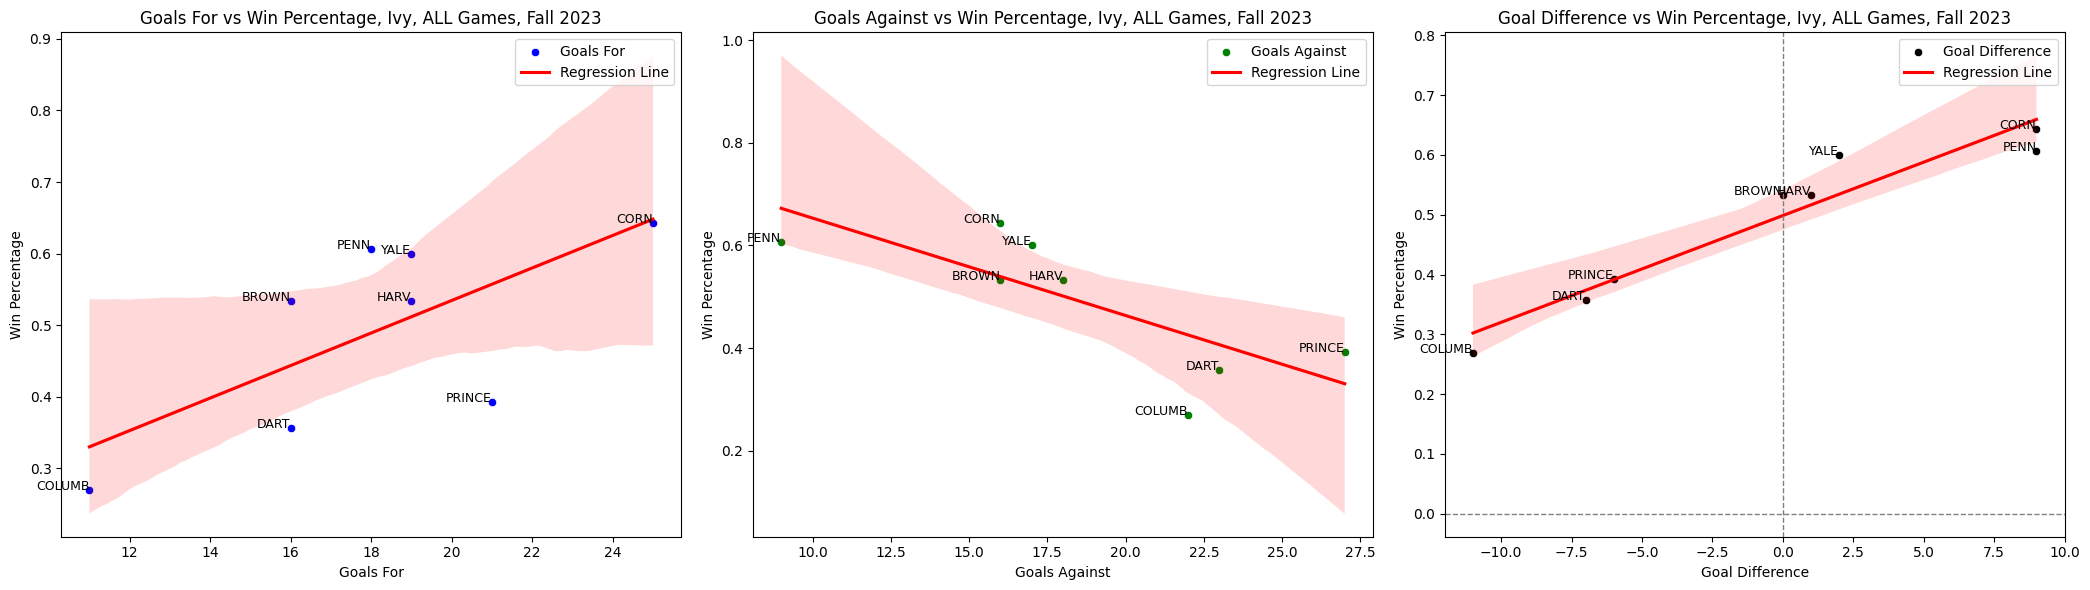

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

# Fit the linear models
gf_lm = smf.ols(formula='GF ~ wpc', data=Ivy_F23_Merged).fit()
ga_lm = smf.ols(formula='GA ~ wpc', data=Ivy_F23_Merged).fit()
gdf_lm = smf.ols(formula='GD ~ wpc', data=Ivy_F23_Merged).fit()

# Create a figure with three subplots
fig, axes = plt.subplots(1, 3, figsize=(21, 6))  # Adjusted figsize to accommodate three plots

# Scatter plot and regression line for GF ~ wpc
sns.scatterplot(x='GF', y='wpc', data=Ivy_F23_Merged, ax=axes[0], color='blue', label='Goals For')
sns.regplot(x='GF', y='wpc', data=Ivy_F23_Merged, ax=axes[0], scatter=False, color='red', label='Regression Line')
axes[0].set_title('Goals For vs Win Percentage, Ivy, ALL Games, Fall 2023')
axes[0].set_xlabel('Goals For')
axes[0].set_ylabel('Win Percentage')

# Add team labels to the GF plot
for index, row in Ivy_F23_Merged.iterrows():
    axes[0].text(row['GF'],
                 row['wpc'],
                 row['Teams'],
                 fontsize=9, ha='right')

axes[0].legend()

# Scatter plot and regression line for GA ~ wpc
sns.scatterplot(x='GA', y='wpc', data=Ivy_F23_Merged, ax=axes[1], color='green', label='Goals Against')
sns.regplot(x='GA', y='wpc', data=Ivy_F23_Merged, ax=axes[1], scatter=False, color='red', label='Regression Line')
axes[1].set_title('Goals Against vs Win Percentage, Ivy, ALL Games, Fall 2023')
axes[1].set_xlabel('Goals Against')
axes[1].set_ylabel('Win Percentage')

# Add team labels to the GA plot
for index, row in Ivy_F23_Merged.iterrows():
    axes[1].text(row['GA'],
                 row['wpc'],
                 row['Teams'],
                 fontsize=9, ha='right')


axes[1].legend()

# Scatter plot and regression line for GD ~ wpc
sns.scatterplot(x='GD', y='wpc', data=Ivy_F23_Merged, ax=axes[2], color='black', label='Goal Difference')
sns.regplot(x='GD', y='wpc', data=Ivy_F23_Merged, ax=axes[2], scatter=False, color='red', label='Regression Line')
axes[2].set_title('Goal Difference vs Win Percentage, Ivy, ALL Games, Fall 2023')
axes[2].set_xlabel('Goal Difference')
axes[2].set_ylabel('Win Percentage')

# Add team labels to the GD plot
for index, row in Ivy_F23_Merged.iterrows():
    axes[2].text(row['GD'],
                 row['wpc'],
                 row['Teams'],
                 fontsize=9, ha='right')

axes[2].legend()
plt.axhline(0, color='gray', linestyle='--', linewidth=1)
plt.axvline(0, color='gray', linestyle='--', linewidth=1)

# Show the plots
plt.tight_layout()
plt.show()


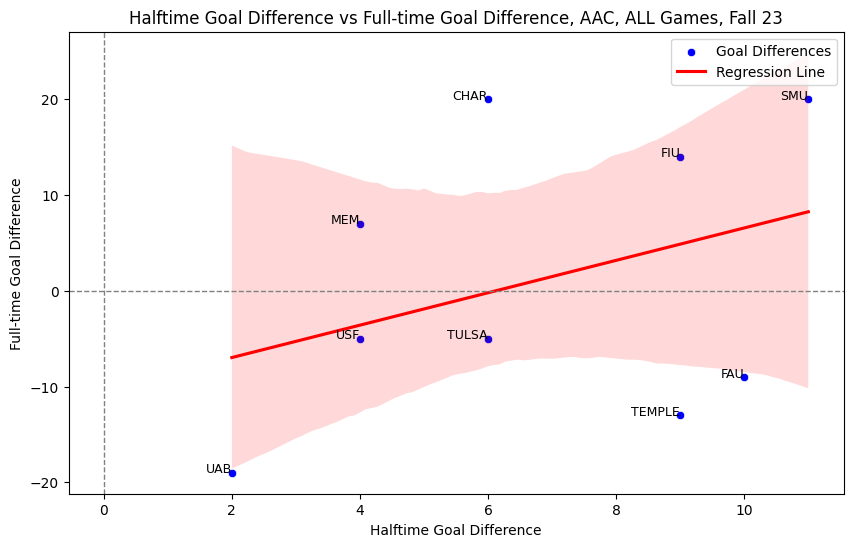

In [ ]:
# Plot Halftime Goal Difference vs Full-time Goal Difference, ALL Games
plt.figure(figsize=(10, 6))
sns.scatterplot(x='HTGD', y='GD', data=Ivy_F23_Merged, color='blue', label='Goal Differences')
sns.regplot(x='HTGD', y='GD', data=Ivy_F23_Merged, scatter=False, color='red', label='Regression Line')
# Add team labels to the plot
for index, row in Ivy_F23_Merged.iterrows():
    plt.text(row['HTGD'],
                 row['GD'],
                 row['Teams'],
                 fontsize=9, ha='right')

plt.title('Halftime Goal Difference vs Full-time Goal Difference, Ivy, ALL Games, Fall 23')
plt.xlabel('Halftime Goal Difference')
plt.ylabel('Full-time Goal Difference')
plt.axhline(0, color='gray', linestyle='--', linewidth=1)
plt.axvline(0, color='gray', linestyle='--', linewidth=1)
plt.legend()
plt.show()

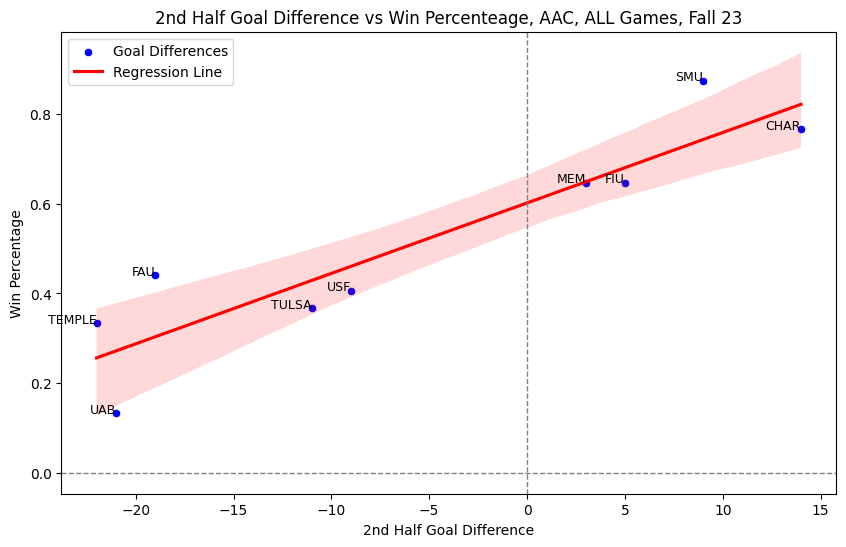

In [ ]:
# Plot Halftime Goal Difference vs Full-time Goal Difference, ALL Games
plt.figure(figsize=(10, 6))
sns.scatterplot(x='2GD', y='wpc', data=Ivy_F23_Merged, color='blue', label='Goal Differences')
sns.regplot(x='2GD', y='wpc', data=Ivy_F23_Merged, scatter=False, color='red', label='Regression Line')
# Add team labels to the plot
for index, row in Ivy_F23_Merged.iterrows():
    plt.text(row['2GD'],
                 row['wpc'],
                 row['Teams'],
                 fontsize=9, ha='right')

plt.title('2nd Half Goal Difference vs Win Percenteage, Ivy, ALL Games, Fall 23')
plt.xlabel('2nd Half Goal Difference')
plt.ylabel('Win Percentage')
plt.axhline(0, color='gray', linestyle='--', linewidth=1)
plt.axvline(0, color='gray', linestyle='--', linewidth=1)
plt.legend()
plt.show()

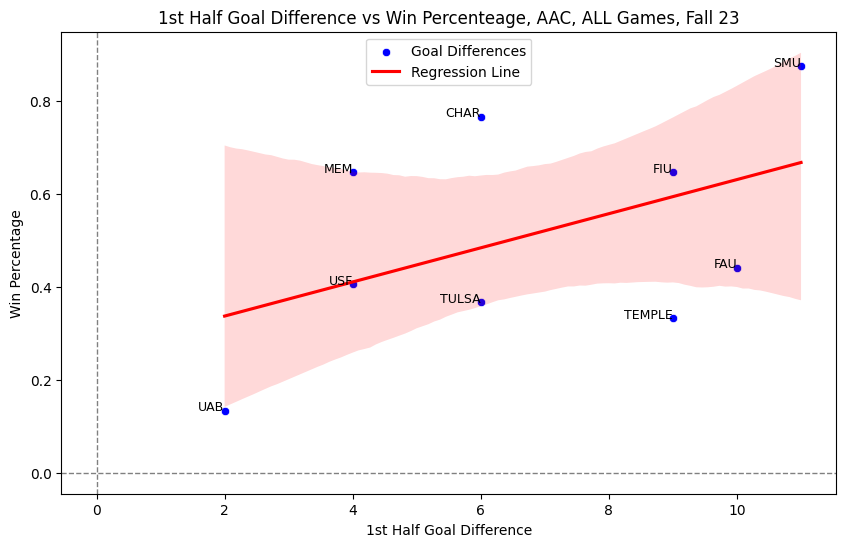

In [ ]:
# Plot Halftime Goal Difference vs Full-time Goal Difference, ALL Games
plt.figure(figsize=(10, 6))
sns.scatterplot(x='HTGD', y='wpc', data=Ivy_F23_Merged, color='blue', label='Goal Differences')
sns.regplot(x='HTGD', y='wpc', data=Ivy_F23_Merged, scatter=False, color='red', label='Regression Line')
# Add team labels to the plot
for index, row in Ivy_F23_Merged.iterrows():
    plt.text(row['HTGD'],
                 row['wpc'],
                 row['Teams'],
                 fontsize=9, ha='right')

plt.title('1st Half Goal Difference vs Win Percenteage, Ivy, ALL Games, Fall 23')
plt.xlabel('1st Half Goal Difference')
plt.ylabel('Win Percentage')
plt.axhline(0, color='gray', linestyle='--', linewidth=1)
plt.axvline(0, color='gray', linestyle='--', linewidth=1)
plt.legend()
plt.show()

In [ ]:
# Change in Goal Difference
Ivy_F23_Merged['Change_GD'] = Ivy_F23_Merged['2GD'] - Ivy_F23_Merged['HTGD']
print(Ivy_F23_Merged[['HTGD', '2GD', 'Change_GD']].describe())

            HTGD        2GD  Change_GD
count   9.000000   9.000000   9.000000
mean    6.777778  -5.666667 -12.444444
std     3.113590  13.738632  13.602492
min     2.000000 -22.000000 -31.000000
25%     4.000000 -19.000000 -23.000000
50%     6.000000  -9.000000 -13.000000
75%     9.000000   5.000000  -2.000000
max    11.000000  14.000000   8.000000


<ipython-input-19-7192c08a7236>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  AAC_F23_Merged['Change_GD'] = AAC_F23_Merged['2GD'] - AAC_F23_Merged['HTGD']


The chart above suggest that Tulsa, alongside USF, FAU, Temple, and UAB, tends to perform well in the first half but loses its advantage in the second half.

In [ ]:
print('Ivy Correlation Matrices:')
# Calculate the correlation matrix
correlation_matrix = Ivy_F23_Merged[['HTGD', 'GD']].corr()
print("correlation matrix HTGD vs GD: " )
print(correlation_matrix)
# Calculate the correlation matrix
correlation_matrix = Ivy_F23_Merged[['GF', 'wpc']].corr()
print("correlation matrix GF vs wpc: " )
print(correlation_matrix)
# Calculate the correlation matrix
correlation_matrix = Ivy_F23_Merged[['GA', 'wpc']].corr()
print("correlation matrix GA vs wpc: " )
print(correlation_matrix)
# Calculate the correlation matrix
correlation_matrix = Ivy_F23_Merged[['GD', 'wpc']].corr()
print("correlation matrix GD vs wpc: " )
print(correlation_matrix)

correlation_matrix = Ivy_F23_Merged[['HTGD', 'wpc']].corr()
print("correlation matrix HTGD vs wpc: " )
print(correlation_matrix)
correlation_matrix = Ivy_F23_Merged[['2GD', 'wpc']].corr()
print("correlation matrix HTGD vs GD: " )
print(correlation_matrix)

AAC Correlation Matrices:
correlation matrix HTGD vs GD: 
          HTGD        GD
HTGD  1.000000  0.361935
GD    0.361935  1.000000
correlation matrix GF vs wpc: 
           GF       wpc
GF   1.000000  0.922966
wpc  0.922966  1.000000
correlation matrix GA vs wpc: 
           GA       wpc
GA   1.000000 -0.888033
wpc -0.888033  1.000000
correlation matrix GD vs wpc: 
           GD       wpc
GD   1.000000  0.967423
wpc  0.967423  1.000000
correlation matrix HTGD vs wpc: 
          HTGD       wpc
HTGD  1.000000  0.484782
wpc   0.484782  1.000000
correlation matrix HTGD vs GD: 
          2GD       wpc
2GD  1.000000  0.915074
wpc  0.915074  1.000000


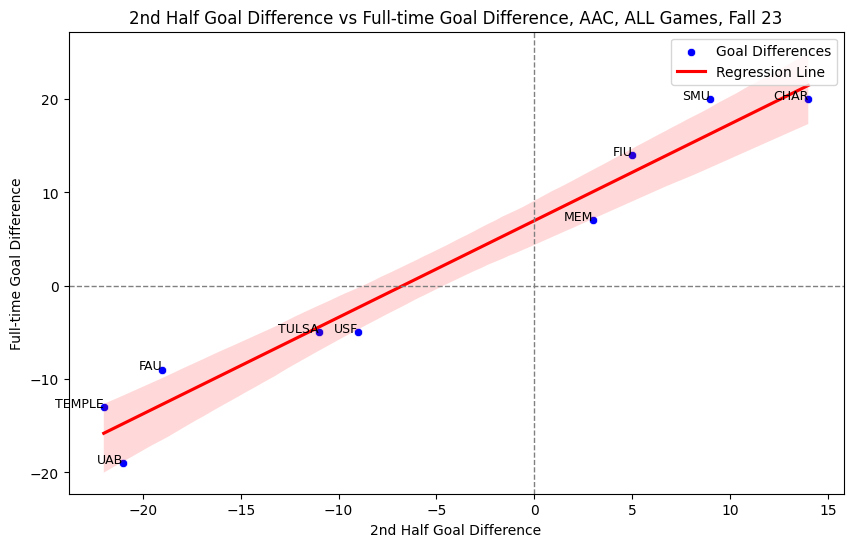

In [ ]:
# Plot Halftime Goal Difference vs Full-time Goal Difference, ALL Games
plt.figure(figsize=(10, 6))
sns.scatterplot(x='2GD', y='GD', data=Ivy_F23_Merged, color='blue', label='Goal Differences')
sns.regplot(x='2GD', y='GD', data=Ivy_F23_Merged, scatter=False, color='red', label='Regression Line')
# Add team labels to the plot
for index, row in Ivy_F23_Merged.iterrows():
    plt.text(row['2GD'],
                 row['GD'],
                 row['Teams'],
                 fontsize=9, ha='right')

plt.title('2nd Half Goal Difference vs Full-time Goal Difference, Ivy, ALL Games, Fall 23')
plt.xlabel('2nd Half Goal Difference')
plt.ylabel('Full-time Goal Difference')
plt.axhline(0, color='gray', linestyle='--', linewidth=1)
plt.axvline(0, color='gray', linestyle='--', linewidth=1)
plt.legend()
plt.show()

In [ ]:
# Calculate the correlation matrix
correlation_matrix = Ivy_F23_Merged[['2GD', 'GD']].corr()
print("correlation matrix: " )
print(correlation_matrix)

correlation matrix: 
          2GD        GD
2GD  1.000000  0.977429
GD   0.977429  1.000000


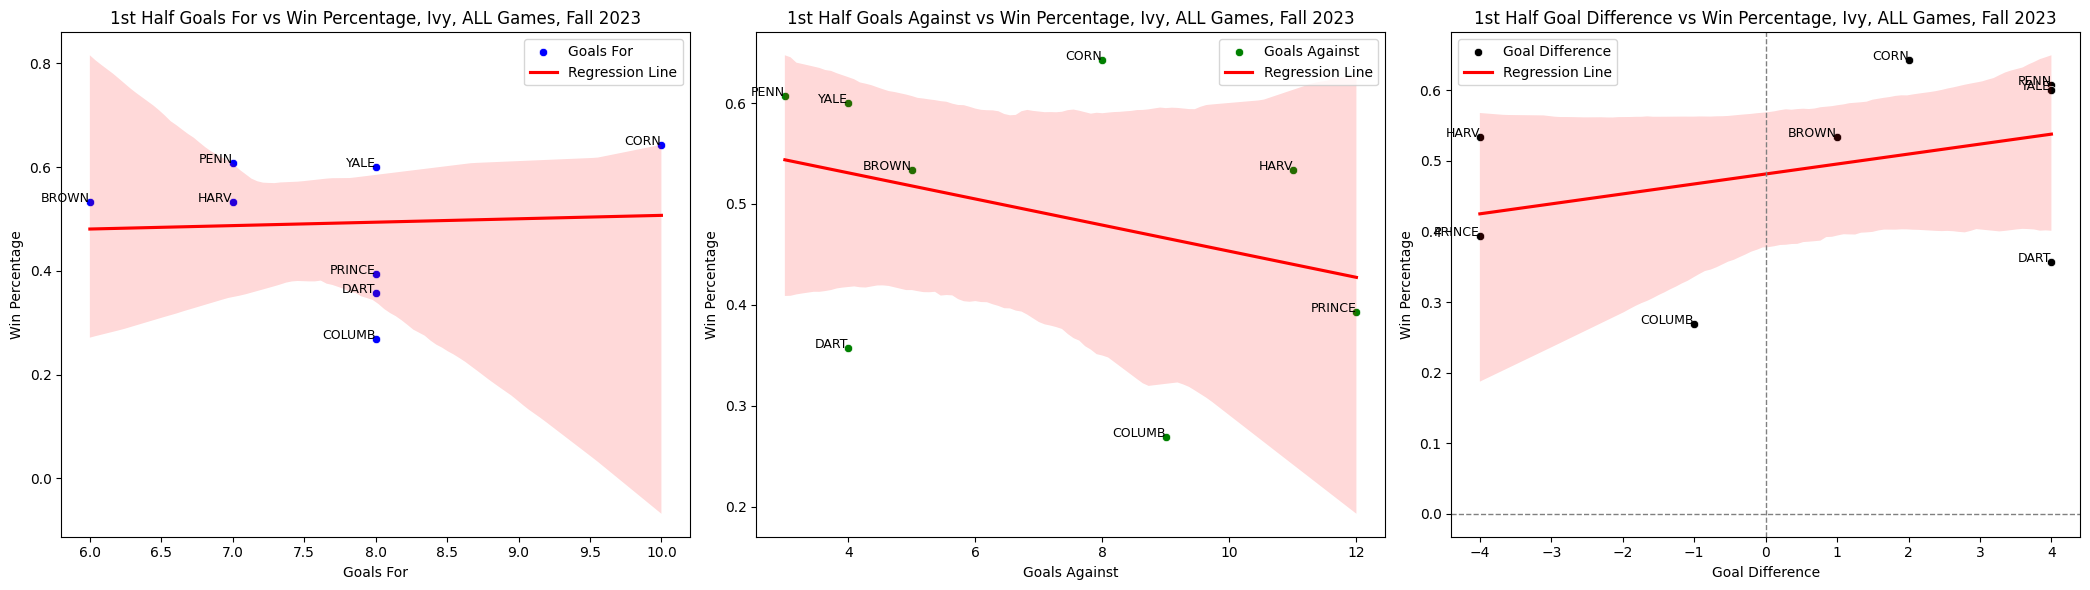

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

# Fit the linear models
gf_lm = smf.ols(formula='HTGF ~ wpc', data=Ivy_F23_Merged).fit()
ga_lm = smf.ols(formula='HTGA ~ wpc', data=Ivy_F23_Merged).fit()
gdf_lm = smf.ols(formula='HTGD ~ wpc', data=Ivy_F23_Merged).fit()

# Create a figure with three subplots
fig, axes = plt.subplots(1, 3, figsize=(21, 6))  # Adjusted figsize to accommodate three plots

# Scatter plot and regression line for GF ~ wpc
sns.scatterplot(x='HTGF', y='wpc', data=Ivy_F23_Merged, ax=axes[0], color='blue', label='Goals For')
sns.regplot(x='HTGF', y='wpc', data=Ivy_F23_Merged, ax=axes[0], scatter=False, color='red', label='Regression Line')
axes[0].set_title('1st Half Goals For vs Win Percentage, Ivy, ALL Games, Fall 2023')
axes[0].set_xlabel('Goals For')
axes[0].set_ylabel('Win Percentage')

# Add team labels to the GF plot
for index, row in Ivy_F23_Merged.iterrows():
    axes[0].text(row['HTGF'],
                 row['wpc'],
                 row['Teams'],
                 fontsize=9, ha='right')

axes[0].legend()

# Scatter plot and regression line for GA ~ wpc
sns.scatterplot(x='HTGA', y='wpc', data=Ivy_F23_Merged, ax=axes[1], color='green', label='Goals Against')
sns.regplot(x='HTGA', y='wpc', data=Ivy_F23_Merged, ax=axes[1], scatter=False, color='red', label='Regression Line')
axes[1].set_title('1st Half Goals Against vs Win Percentage, Ivy, ALL Games, Fall 2023')
axes[1].set_xlabel('Goals Against')
axes[1].set_ylabel('Win Percentage')

# Add team labels to the GA plot
for index, row in Ivy_F23_Merged.iterrows():
    axes[1].text(row['HTGA'],
                 row['wpc'],
                 row['Teams'],
                 fontsize=9, ha='right')


axes[1].legend()

# Scatter plot and regression line for GD ~ wpc
sns.scatterplot(x='HTGD', y='wpc', data=Ivy_F23_Merged, ax=axes[2], color='black', label='Goal Difference')
sns.regplot(x='HTGD', y='wpc', data=Ivy_F23_Merged, ax=axes[2], scatter=False, color='red', label='Regression Line')
axes[2].set_title('1st Half Goal Difference vs Win Percentage, Ivy, ALL Games, Fall 2023')
axes[2].set_xlabel('Goal Difference')
axes[2].set_ylabel('Win Percentage')

# Add team labels to the GD plot
for index, row in Ivy_F23_Merged.iterrows():
    axes[2].text(row['HTGD'],
                 row['wpc'],
                 row['Teams'],
                 fontsize=9, ha='right')

axes[2].legend()
plt.axhline(0, color='gray', linestyle='--', linewidth=1)
plt.axvline(0, color='gray', linestyle='--', linewidth=1)

# Show the plots
plt.tight_layout()
plt.show()


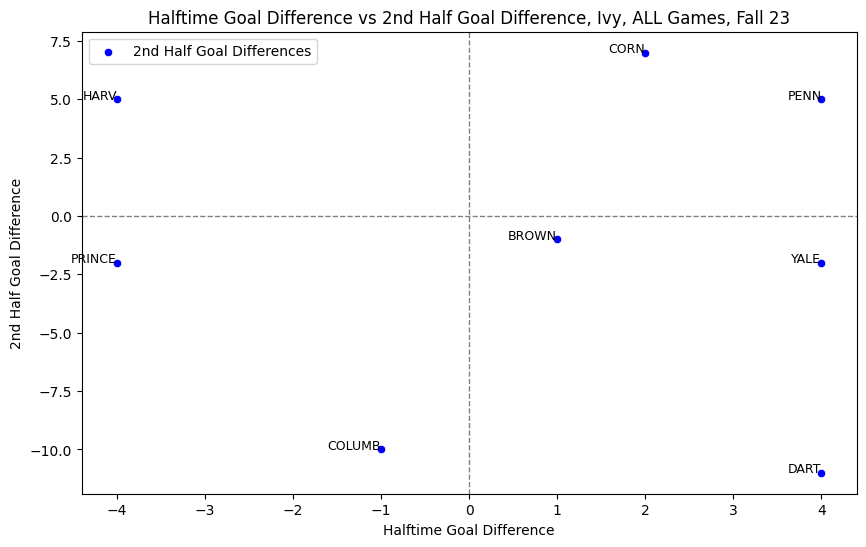

In [42]:
# Plot Halftime Goal Difference vs Full-time Goal Difference
plt.figure(figsize=(10, 6))
sns.scatterplot(x='HTGD', y='2GD', data=Ivy_F23_Merged, color='blue', label='2nd Half Goal Differences')
# sns.regplot(x='HTGD', y='2GD', data=Ivy_F23_Merged, scatter=False, color='red', label='Regression Line')

# Iterate over the rows of the DataFrame using iterrows()
for index, row in Ivy_F23_Merged.iterrows():
    plt.text(row['HTGD'], row['2GD'], row['Teams'], fontsize=9, ha='right')

plt.title('Halftime Goal Difference vs 2nd Half Goal Difference, Ivy, ALL Games, Fall 23')
plt.xlabel('Halftime Goal Difference')
plt.ylabel('2nd Half Goal Difference')
plt.axhline(0, color='gray', linestyle='--', linewidth=1)
plt.axvline(0, color='gray', linestyle='--', linewidth=1)
plt.legend()
plt.show()

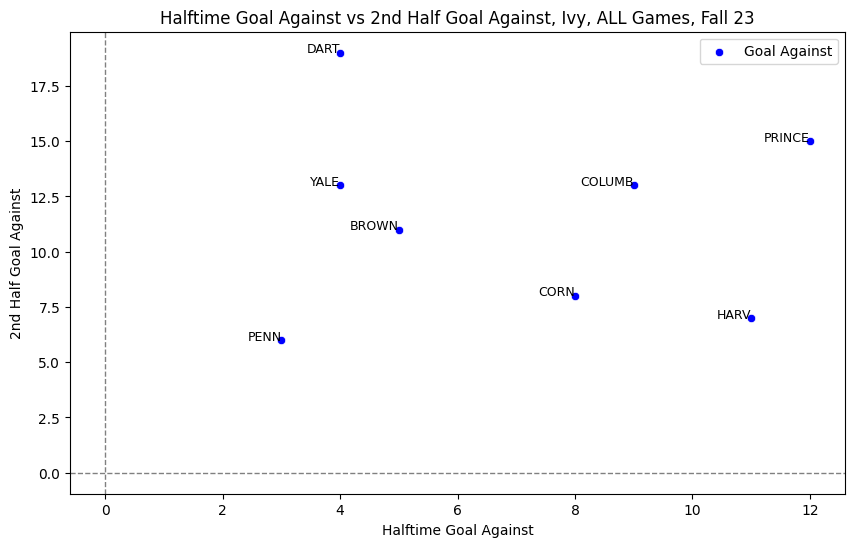

In [43]:
# Plot Halftime Goal Difference vs Full-time Goal Difference
plt.figure(figsize=(10, 6))
sns.scatterplot(x='HTGA', y='2GA', data=Ivy_F23_Merged, color='blue', label='Goal Against')
# sns.regplot(x='HTGD', y='2GD', data=Ivy_F23_Merged, scatter=False, color='red', label='Regression Line')

# Iterate over the rows of the DataFrame using iterrows()
for index, row in Ivy_F23_Merged.iterrows():
    plt.text(row['HTGA'], row['2GA'], row['Teams'], fontsize=9, ha='right')

plt.title('Halftime Goal Against vs 2nd Half Goal Against, Ivy, ALL Games, Fall 23')
plt.xlabel('Halftime Goal Against')
plt.ylabel('2nd Half Goal Against')
plt.axhline(0, color='gray', linestyle='--', linewidth=1)
plt.axvline(0, color='gray', linestyle='--', linewidth=1)
plt.legend()
plt.show()

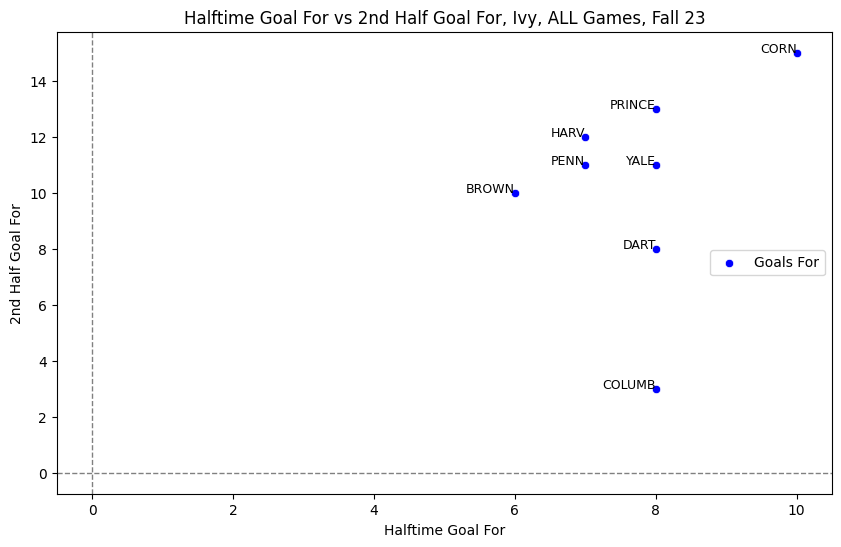

In [44]:
# Plot Halftime Goal Difference vs Full-time Goal Difference
plt.figure(figsize=(10, 6))
sns.scatterplot(x='HTGF', y='2GF', data=Ivy_F23_Merged, color='blue', label='Goals For')
# sns.regplot(x='HTGD', y='2GD', data=Ivy_F23_Merged, scatter=False, color='red', label='Regression Line')

# Iterate over the rows of the DataFrame using iterrows()
for index, row in Ivy_F23_Merged.iterrows():
    plt.text(row['HTGF'], row['2GF'], row['Teams'], fontsize=9, ha='right')

plt.title('Halftime Goal For vs 2nd Half Goal For, Ivy, ALL Games, Fall 23')
plt.xlabel('Halftime Goal For')
plt.ylabel('2nd Half Goal For')
plt.axhline(0, color='gray', linestyle='--', linewidth=1)
plt.axvline(0, color='gray', linestyle='--', linewidth=1)
plt.legend()
plt.show()

In [46]:
Ivy_F23_Merged['2GFRatio'] = Ivy_F23_Merged['2GF'] / Ivy_F23_Merged['HTGF']
Ivy_F23_Merged['2GARatio'] = Ivy_F23_Merged['2GA'] / Ivy_F23_Merged['HTGA']
Ivy_F23_Merged['1GFRatio'] = Ivy_F23_Merged['HTGF'] / Ivy_F23_Merged['2GF']
Ivy_F23_Merged['1GARatio'] = Ivy_F23_Merged['HTGA'] / Ivy_F23_Merged['2GA']
Ivy_F23_Merged['GF/GARatio'] = Ivy_F23_Merged['GF'] / Ivy_F23_Merged['GA']
Ivy_F23_Merged

<ipython-input-46-5fb936ec8b6d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Ivy_F23_Merged['2GFRatio'] = Ivy_F23_Merged['2GF'] / Ivy_F23_Merged['HTGF']
<ipython-input-46-5fb936ec8b6d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Ivy_F23_Merged['2GARatio'] = Ivy_F23_Merged['2GA'] / Ivy_F23_Merged['HTGA']
<ipython-input-46-5fb936ec8b6d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveat

,Teams,Played Home_x,awinvalue,HTAG_x,HTHG_x,Scored_x,Conceded_x,Played Home_y,hwinvalue,HTHG_y,HTAG_y,Scored_y,Conceded_y,W,G,GF,GA,GD,HTGA,HTGF,HTGD,2GF,2GA,2GD,Change_GD,awpc,hwpc,awpc:hwpc,wpc,pyth,pyth_ht,pyth_h2,pyth_diff,2GFRatio,2GARatio,1GFRatio,1GARatio,GF/GARatio
0,BROWN,6,3.0,1,2,3,4,9,5.0,4,4,13,12,8.0,15,16,16,0,5,6,1,10,11,-1,-2,0.500000,0.555556,0.900000,0.533333,0.500000,0.590164,0.452489,-0.137675,1.666667,2.200000,0.600000,0.454545,1.000000
1,COLUMB,8,1.0,4,6,4,17,5,2.5,2,5,7,5,3.5,13,11,22,-11,9,8,-1,3,13,-10,-9,0.125000,0.500000,0.250000,0.269231,0.200000,0.441379,0.050562,-0.390818,0.375000,1.444444,2.666667,0.692308,0.500000
2,CORN,8,4.5,5,3,11,8,6,4.5,7,3,14,8,9.0,14,25,16,9,8,10,2,15,8,7,5,0.562500,0.750000,0.750000,0.642857,0.709421,0.609756,0.778547,0.168791,1.500000,1.000000,0.666667,1.000000,1.562500
3,DART,7,2.0,2,3,5,12,7,3.0,5,2,11,11,5.0,14,16,23,-7,4,8,4,8,19,-11,-15,0.285714,0.428571,0.666667,0.357143,0.326115,0.800000,0.150588,-0.649412,1.000000,4.750000,1.000000,0.210526,0.695652
6,HARV,6,3.0,6,5,10,8,9,5.0,2,5,9,10,8.0,15,19,18,1,11,7,-4,12,7,5,9,0.500000,0.555556,0.900000,0.533333,0.527007,0.288235,0.746114,0.457879,1.714286,0.636364,0.583333,1.571429,1.055556
10,PENN,8,3.5,1,2,5,5,6,5.0,5,2,13,4,8.5,14,18,9,9,3,7,4,11,6,5,1,0.437500,0.833333,0.525000,0.607143,0.800000,0.844828,0.770701,-0.074127,1.571429,2.000000,0.636364,0.500000,2.000000
11,PRINCE,6,1.5,4,5,9,15,8,4.0,3,8,12,12,5.5,14,21,27,-6,12,8,-4,13,15,-2,2,0.250000,0.500000,0.500000,0.392857,0.376923,0.307692,0.428934,0.121242,1.625000,1.250000,0.615385,0.800000,0.777778
20,YALE,8,3.5,3,4,8,12,7,5.5,4,1,11,5,9.0,15,19,17,2,4,8,4,11,13,-2,-6,0.437500,0.785714,0.556818,0.600000,0.555385,0.800000,0.417241,-0.382759,1.375000,3.250000,0.727273,0.307692,1.117647


<ipython-input-47-62a848a28c7c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Ivy_F23_Merged.replace([float('inf'), -float('inf')], pd.NA, inplace=True)
<ipython-input-47-62a848a28c7c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Ivy_F23_Merged.dropna(subset=['2GFRatio'], inplace=True)
<ipython-input-47-62a848a28c7c>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='2GFRatio', y='Teams', data=Ivy_F23_Merged_sorted, palette='Blues_d')


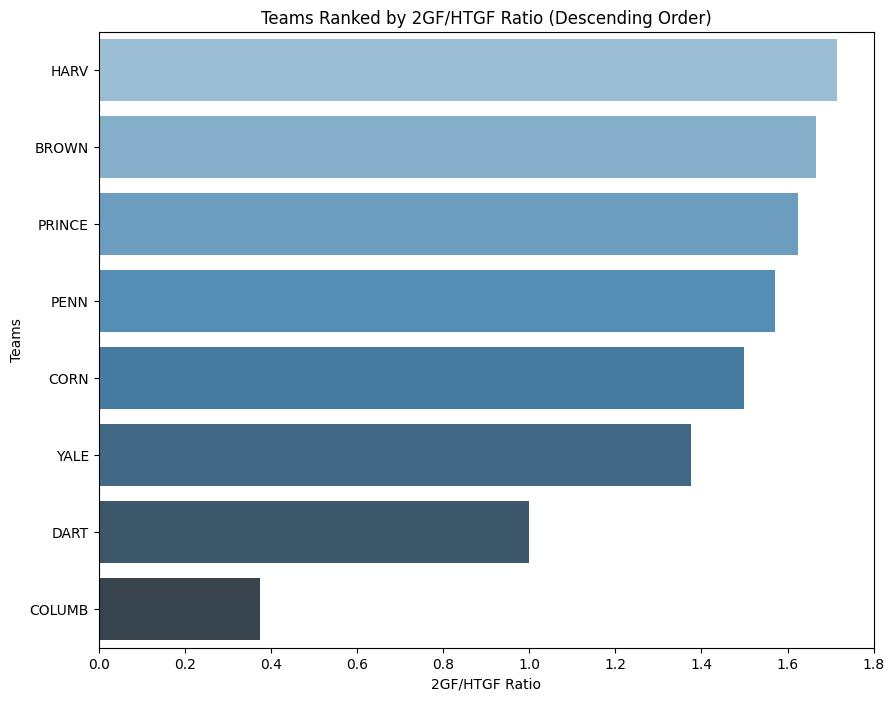

In [47]:
# Handle any potential infinite or NaN values (e.g., when HTGF is 0)
Ivy_F23_Merged.replace([float('inf'), -float('inf')], pd.NA, inplace=True)
Ivy_F23_Merged.dropna(subset=['2GFRatio'], inplace=True)

# Sort the DataFrame by the ratio in ascending order
Ivy_F23_Merged_sorted = Ivy_F23_Merged.sort_values('2GFRatio', ascending = False)

# Plot the data
plt.figure(figsize=(10, 8))
sns.barplot(x='2GFRatio', y='Teams', data=Ivy_F23_Merged_sorted, palette='Blues_d')

plt.title('Teams Ranked by 2GF/HTGF Ratio (Descending Order)')
plt.xlabel('2GF/HTGF Ratio')
plt.ylabel('Teams')
plt.show()

<ipython-input-48-37846e16f88e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Ivy_F23_Merged.replace([float('inf'), -float('inf')], pd.NA, inplace=True)
<ipython-input-48-37846e16f88e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Ivy_F23_Merged.dropna(subset=['2GARatio'], inplace=True)
<ipython-input-48-37846e16f88e>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='2GARatio', y='Teams', data=Ivy_F23_Merged_sorted, palette='Reds_d')


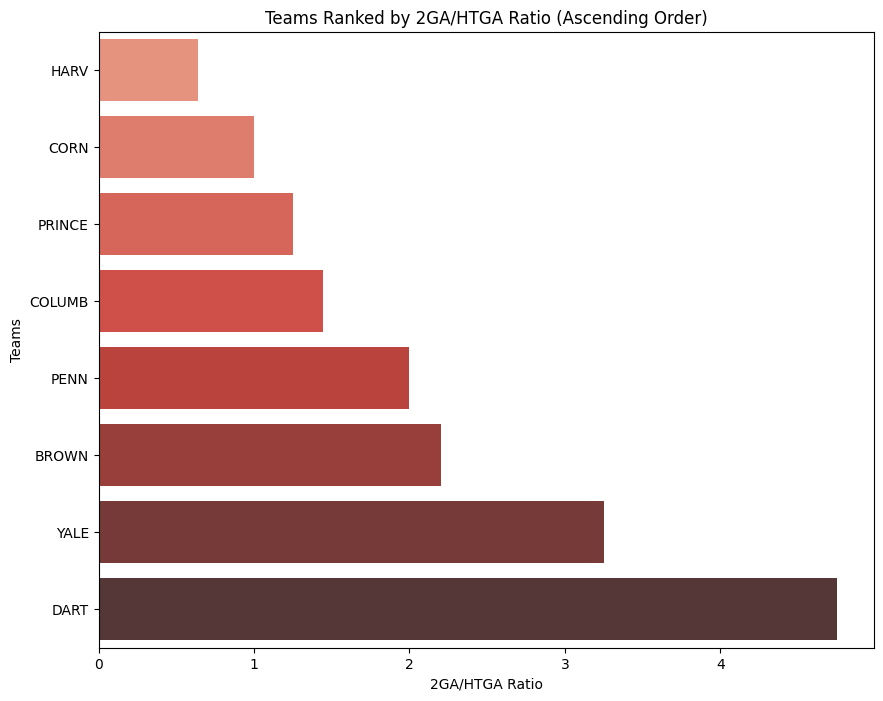

,Teams,Played Home_x,awinvalue,HTAG_x,HTHG_x,Scored_x,Conceded_x,Played Home_y,hwinvalue,HTHG_y,HTAG_y,Scored_y,Conceded_y,W,G,GF,GA,GD,HTGA,HTGF,HTGD,2GF,2GA,2GD,Change_GD,awpc,hwpc,awpc:hwpc,wpc,pyth,pyth_ht,pyth_h2,pyth_diff,2GFRatio,2GARatio,1GFRatio,1GARatio,GF/GARatio
6,HARV,6,3.0,6,5,10,8,9,5.0,2,5,9,10,8.0,15,19,18,1,11,7,-4,12,7,5,9,0.500000,0.555556,0.900000,0.533333,0.527007,0.288235,0.746114,0.457879,1.714286,0.636364,0.583333,1.571429,1.055556
2,CORN,8,4.5,5,3,11,8,6,4.5,7,3,14,8,9.0,14,25,16,9,8,10,2,15,8,7,5,0.562500,0.750000,0.750000,0.642857,0.709421,0.609756,0.778547,0.168791,1.500000,1.000000,0.666667,1.000000,1.562500
11,PRINCE,6,1.5,4,5,9,15,8,4.0,3,8,12,12,5.5,14,21,27,-6,12,8,-4,13,15,-2,2,0.250000,0.500000,0.500000,0.392857,0.376923,0.307692,0.428934,0.121242,1.625000,1.250000,0.615385,0.800000,0.777778
1,COLUMB,8,1.0,4,6,4,17,5,2.5,2,5,7,5,3.5,13,11,22,-11,9,8,-1,3,13,-10,-9,0.125000,0.500000,0.250000,0.269231,0.200000,0.441379,0.050562,-0.390818,0.375000,1.444444,2.666667,0.692308,0.500000
10,PENN,8,3.5,1,2,5,5,6,5.0,5,2,13,4,8.5,14,18,9,9,3,7,4,11,6,5,1,0.437500,0.833333,0.525000,0.607143,0.800000,0.844828,0.770701,-0.074127,1.571429,2.000000,0.636364,0.500000,2.000000
0,BROWN,6,3.0,1,2,3,4,9,5.0,4,4,13,12,8.0,15,16,16,0,5,6,1,10,11,-1,-2,0.500000,0.555556,0.900000,0.533333,0.500000,0.590164,0.452489,-0.137675,1.666667,2.200000,0.600000,0.454545,1.000000
20,YALE,8,3.5,3,4,8,12,7,5.5,4,1,11,5,9.0,15,19,17,2,4,8,4,11,13,-2,-6,0.437500,0.785714,0.556818,0.600000,0.555385,0.800000,0.417241,-0.382759,1.375000,3.250000,0.727273,0.307692,1.117647
3,DART,7,2.0,2,3,5,12,7,3.0,5,2,11,11,5.0,14,16,23,-7,4,8,4,8,19,-11,-15,0.285714,0.428571,0.666667,0.357143,0.326115,0.800000,0.150588,-0.649412,1.000000,4.750000,1.000000,0.210526,0.695652


In [48]:
# Handle any potential infinite or NaN values (e.g., when HTGF is 0)
Ivy_F23_Merged.replace([float('inf'), -float('inf')], pd.NA, inplace=True)
Ivy_F23_Merged.dropna(subset=['2GARatio'], inplace=True)

# Sort the DataFrame by the ratio in ascending order
Ivy_F23_Merged_sorted = Ivy_F23_Merged.sort_values('2GARatio', ascending = True)

# Plot the data
plt.figure(figsize=(10, 8))
sns.barplot(x='2GARatio', y='Teams', data=Ivy_F23_Merged_sorted, palette='Reds_d')

plt.title('Teams Ranked by 2GA/HTGA Ratio (Ascending Order)')
plt.xlabel('2GA/HTGA Ratio')
plt.ylabel('Teams')
plt.show()

Ivy_F23_Merged_sorted

<ipython-input-49-8481595978bb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Ivy_F23_Merged.replace([float('inf'), -float('inf')], pd.NA, inplace=True)
<ipython-input-49-8481595978bb>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Ivy_F23_Merged.dropna(subset=['GF/GARatio'], inplace=True)
<ipython-input-49-8481595978bb>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='GF/GARatio', y='Teams', data=Ivy_F23_Merged_sorted, palette='Blues_d')


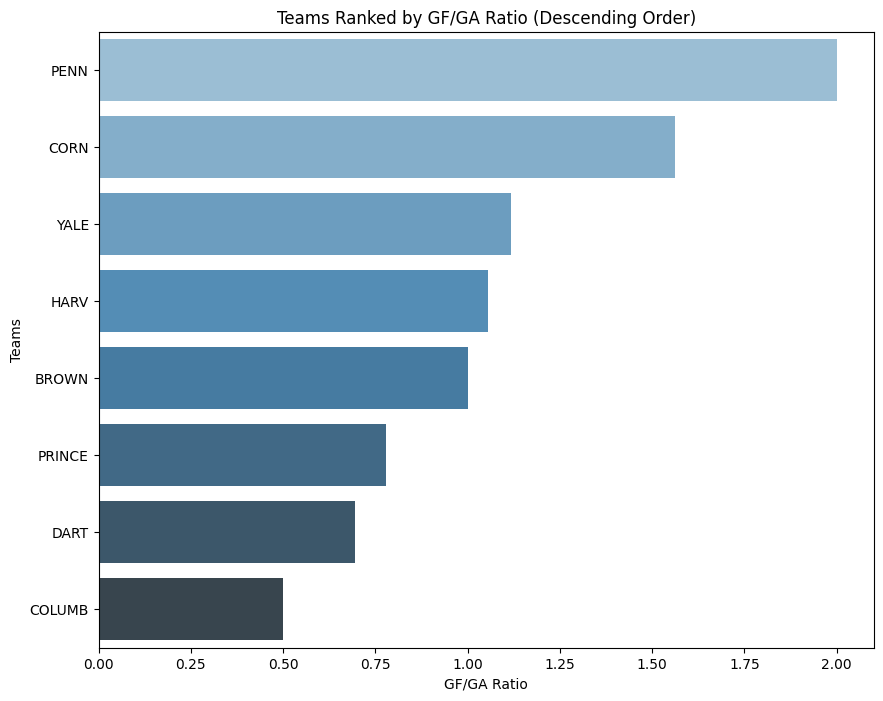

,Teams,Played Home_x,awinvalue,HTAG_x,HTHG_x,Scored_x,Conceded_x,Played Home_y,hwinvalue,HTHG_y,HTAG_y,Scored_y,Conceded_y,W,G,GF,GA,GD,HTGA,HTGF,HTGD,2GF,2GA,2GD,Change_GD,awpc,hwpc,awpc:hwpc,wpc,pyth,pyth_ht,pyth_h2,pyth_diff,2GFRatio,2GARatio,1GFRatio,1GARatio,GF/GARatio
10,PENN,8,3.5,1,2,5,5,6,5.0,5,2,13,4,8.5,14,18,9,9,3,7,4,11,6,5,1,0.437500,0.833333,0.525000,0.607143,0.800000,0.844828,0.770701,-0.074127,1.571429,2.000000,0.636364,0.500000,2.000000
2,CORN,8,4.5,5,3,11,8,6,4.5,7,3,14,8,9.0,14,25,16,9,8,10,2,15,8,7,5,0.562500,0.750000,0.750000,0.642857,0.709421,0.609756,0.778547,0.168791,1.500000,1.000000,0.666667,1.000000,1.562500
20,YALE,8,3.5,3,4,8,12,7,5.5,4,1,11,5,9.0,15,19,17,2,4,8,4,11,13,-2,-6,0.437500,0.785714,0.556818,0.600000,0.555385,0.800000,0.417241,-0.382759,1.375000,3.250000,0.727273,0.307692,1.117647
6,HARV,6,3.0,6,5,10,8,9,5.0,2,5,9,10,8.0,15,19,18,1,11,7,-4,12,7,5,9,0.500000,0.555556,0.900000,0.533333,0.527007,0.288235,0.746114,0.457879,1.714286,0.636364,0.583333,1.571429,1.055556
0,BROWN,6,3.0,1,2,3,4,9,5.0,4,4,13,12,8.0,15,16,16,0,5,6,1,10,11,-1,-2,0.500000,0.555556,0.900000,0.533333,0.500000,0.590164,0.452489,-0.137675,1.666667,2.200000,0.600000,0.454545,1.000000
11,PRINCE,6,1.5,4,5,9,15,8,4.0,3,8,12,12,5.5,14,21,27,-6,12,8,-4,13,15,-2,2,0.250000,0.500000,0.500000,0.392857,0.376923,0.307692,0.428934,0.121242,1.625000,1.250000,0.615385,0.800000,0.777778
3,DART,7,2.0,2,3,5,12,7,3.0,5,2,11,11,5.0,14,16,23,-7,4,8,4,8,19,-11,-15,0.285714,0.428571,0.666667,0.357143,0.326115,0.800000,0.150588,-0.649412,1.000000,4.750000,1.000000,0.210526,0.695652
1,COLUMB,8,1.0,4,6,4,17,5,2.5,2,5,7,5,3.5,13,11,22,-11,9,8,-1,3,13,-10,-9,0.125000,0.500000,0.250000,0.269231,0.200000,0.441379,0.050562,-0.390818,0.375000,1.444444,2.666667,0.692308,0.500000


In [49]:
# Handle any potential infinite or NaN values (e.g., when HTGF is 0)
Ivy_F23_Merged.replace([float('inf'), -float('inf')], pd.NA, inplace=True)
Ivy_F23_Merged.dropna(subset=['GF/GARatio'], inplace=True)

# Sort the DataFrame by the ratio in ascending order
Ivy_F23_Merged_sorted = Ivy_F23_Merged.sort_values('GF/GARatio', ascending = False)

# Plot the data
plt.figure(figsize=(10, 8))
sns.barplot(x='GF/GARatio', y='Teams', data=Ivy_F23_Merged_sorted, palette='Blues_d')

plt.title('Teams Ranked by GF/GA Ratio (Descending Order)')
plt.xlabel('GF/GA Ratio')
plt.ylabel('Teams')
plt.show()

Ivy_F23_Merged_sorted

<ipython-input-52-b192939a9d8d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Ivy_F23_Merged.replace([float('inf'), -float('inf')], pd.NA, inplace=True)
<ipython-input-52-b192939a9d8d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Ivy_F23_Merged.dropna(subset=['hwpc'], inplace=True)
<ipython-input-52-b192939a9d8d>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='hwpc', y='Teams', data=Ivy_F23_Merged_sorted, palette='Blues_d')


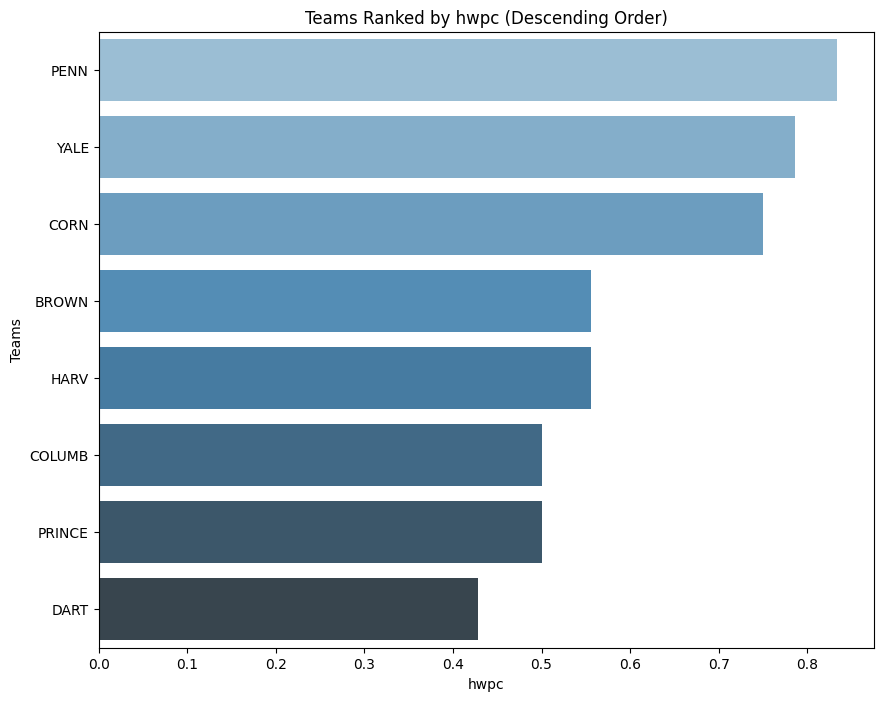

In [52]:
# Handle any potential infinite or NaN values (e.g., when HTGF is 0)
Ivy_F23_Merged.replace([float('inf'), -float('inf')], pd.NA, inplace=True)
Ivy_F23_Merged.dropna(subset=['hwpc'], inplace=True)

# Sort the DataFrame by the ratio in ascending order
Ivy_F23_Merged_sorted = Ivy_F23_Merged.sort_values('hwpc', ascending = False)

# Plot the data
plt.figure(figsize=(10, 8))
sns.barplot(x='hwpc', y='Teams', data=Ivy_F23_Merged_sorted, palette='Blues_d')

plt.title('Teams Ranked by hwpc (Descending Order)')
plt.xlabel('hwpc')
plt.ylabel('Teams')
plt.show()



<ipython-input-53-d46f530cb021>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Ivy_F23_Merged.replace([float('inf'), -float('inf')], pd.NA, inplace=True)
<ipython-input-53-d46f530cb021>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Ivy_F23_Merged.dropna(subset=['awpc'], inplace=True)
<ipython-input-53-d46f530cb021>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='awpc', y='Teams', data=Ivy_F23_Merged_sorted, palette='Blues_d')


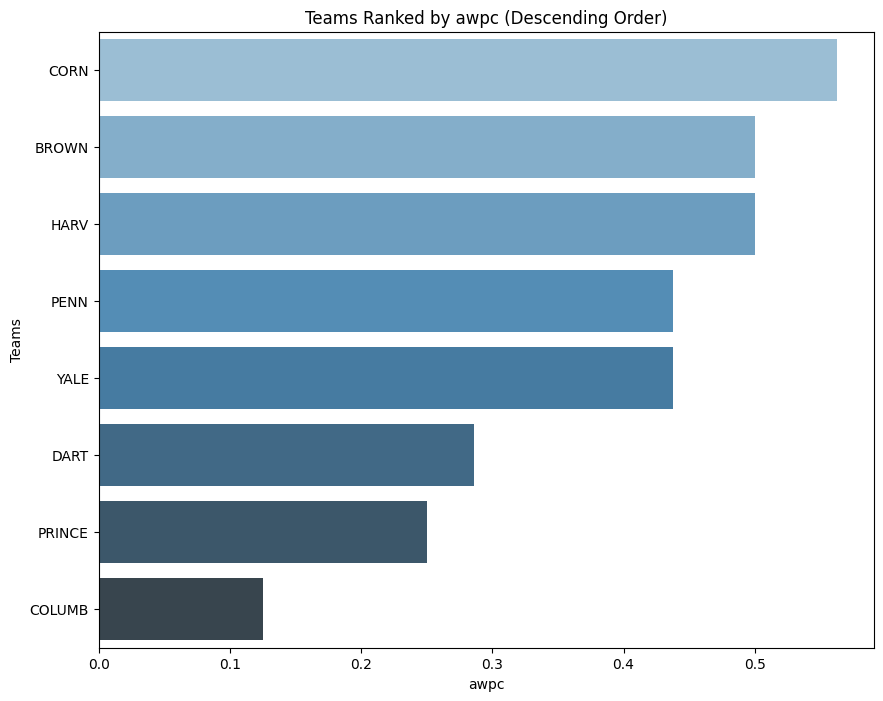

In [53]:
# Handle any potential infinite or NaN values (e.g., when HTGF is 0)
Ivy_F23_Merged.replace([float('inf'), -float('inf')], pd.NA, inplace=True)
Ivy_F23_Merged.dropna(subset=['awpc'], inplace=True)

# Sort the DataFrame by the ratio in ascending order
Ivy_F23_Merged_sorted = Ivy_F23_Merged.sort_values('awpc', ascending = False)

# Plot the data
plt.figure(figsize=(10, 8))
sns.barplot(x='awpc', y='Teams', data=Ivy_F23_Merged_sorted, palette='Blues_d')

plt.title('Teams Ranked by awpc (Descending Order)')
plt.xlabel('awpc')
plt.ylabel('Teams')
plt.show()



<ipython-input-51-0e636e882c08>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Ivy_F23_Merged.replace([float('inf'), -float('inf')], pd.NA, inplace=True)
<ipython-input-51-0e636e882c08>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Ivy_F23_Merged.dropna(subset=['awpc:hwpc'], inplace=True)
<ipython-input-51-0e636e882c08>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='awpc:hwpc', y='Teams', data=Ivy_F23_Merged_sorted, palette='Blues_d')


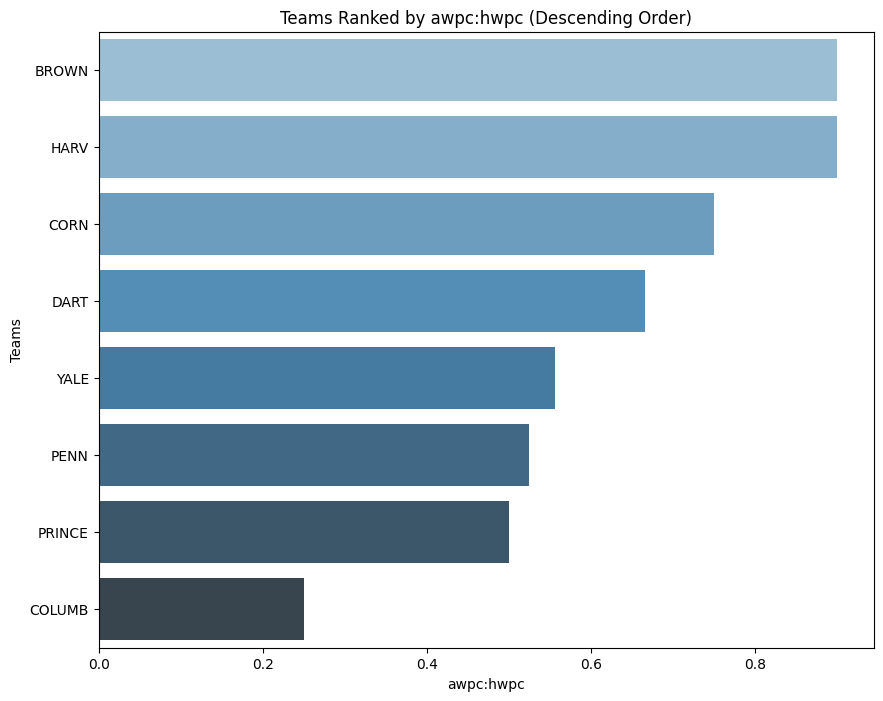

In [51]:
# Handle any potential infinite or NaN values (e.g., when HTGF is 0)
Ivy_F23_Merged.replace([float('inf'), -float('inf')], pd.NA, inplace=True)
Ivy_F23_Merged.dropna(subset=['awpc:hwpc'], inplace=True)

# Sort the DataFrame by the ratio in ascending order
Ivy_F23_Merged_sorted = Ivy_F23_Merged.sort_values('awpc:hwpc', ascending = False)

# Plot the data
plt.figure(figsize=(10, 8))
sns.barplot(x='awpc:hwpc', y='Teams', data=Ivy_F23_Merged_sorted, palette='Blues_d')

plt.title('Teams Ranked by awpc:hwpc (Descending Order)')
plt.xlabel('awpc:hwpc')
plt.ylabel('Teams')
plt.show()

